# **Installing Required Libraries**

**Install Neurokit**

In [1]:
!pip install neurokit2

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.3/1.3 MB 13.0 MB/s eta 0:00:00


**Install required Libraries**

In [2]:
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report

# **Fuctions For Generating and Displaying Synthetic ECG Signals**




**ECG_simulator**

In [3]:
import numpy as np

def ecg_simulate(fs, signal_length, heart_rate, noise_level=0.0, artifact_type=None):
    # Time vector
    t = np.linspace(0, signal_length, int(signal_length * fs), endpoint=False)

    # Validate noise_level
    noise_level = np.clip(noise_level, 0.0, 1.0)

    # Initialize an empty synthetic ECG signal
    synthetic_ecg = np.zeros_like(t)

    # Simulate a clean ECG signal (you can modify this part)
    clean_ecg = 0.5 * np.sin(2 * np.pi * heart_rate / 60 * t)

    # Depending on the artifact_type, add noise or simulate specific artifacts
    if artifact_type == "BaselineWander":
        # Simulate baseline wander (example)
        # Baseline wander refers to low-frequency variations in the ECG signal caused by slow changes in the baseline voltage.
        # These variations are typically caused by factors like respiration or body movement and can obscure the underlying ECG waveform.
        baseline_wander = 0.05 * np.sin(2 * np.pi * 0.1 * t)
        synthetic_ecg = clean_ecg + baseline_wander
        label = "Noisy (Baseline Wander)"

    elif artifact_type == "Clean":
        # Simulate muscle artifact (example)
        # Muscle artifacts are high-frequency noise caused by muscle contractions or movements.
        clean_ecg = 0.5 * np.sin(2 * np.pi * heart_rate / 60 * t)
        synthetic_ecg = clean_ecg
        label = "Noisy (Clean ECG)"

    elif artifact_type == "MuscleArtifact":
        # Simulate muscle artifact (example)
        # Muscle artifacts are high-frequency noise caused by muscle contractions or movements.
        muscle_artifact = 0.3 * np.sin(2 * np.pi * 0.5 * t)
        synthetic_ecg = clean_ecg + muscle_artifact
        label = "Noisy (Muscle Artifact)"

    elif artifact_type == "powerline_interference":
        amplitude = 0.1
        # Simulate powerline interference (example)
        # Powerline interference typically occurs at 50 Hz or 60 Hz, depending on the power grid frequency in your region.
        powerline_interference = amplitude * np.sin(2 * np.pi * 60 * t)
        synthetic_ecg = clean_ecg + powerline_interference
        label = "Noisy (powerline interference)"

    elif artifact_type == "motion_artifact":
        amplitude = 0.1
        # Simulate motion_artifact (example)
        # Motion artifact can be simulated as a high-frequency noise signal. You can use random noise for this purpose:
        motion_artifact = amplitude * np.random.randn(len(t))
        synthetic_ecg = clean_ecg + motion_artifact
        label = "Noisy (motion_artifact)"


    elif artifact_type == "gaussian_noise":
        amplitude = 0.1
        std_deviation = 0.02
        # Simulate gaussian_noise (example)
        # Gaussian noise can be added as random values sampled from a Gaussian (normal) distribution with a specified mean (usually 0) and standard deviation (representing the noise level):
        gaussian_noise = amplitude * np.random.normal(0, std_deviation, len(t))
        synthetic_ecg = clean_ecg + gaussian_noise
        label = "Noisy (gaussian_noise)"

    elif artifact_type == "electrode_motion_artifact":
        amplitude = 0.1
        # Simulate electrode_motion_artifact (example)
        # Electrode motion artifact can be simulated as a high-frequency noise signal similar to motion artifact:
        electrode_motion_artifact = amplitude * np.random.randn(len(t))
        synthetic_ecg = clean_ecg + electrode_motion_artifact
        label = "Noisy (electrode_motion_artifact)"

    elif artifact_type == "electrode_contact_noise":
        amplitude = 0.1
        # Simulate electrode_contact_noise (example)
        # Electrode motion artifact can be simulated as a high-frequency noise signal similar to motion artifact:
        electrode_contact_noise = amplitude * np.zeros(len(t))
        num_spikes = 10  # Adjust the number of spikes as needed
        spike_indices = np.random.randint(0, len(t), num_spikes)
        electrode_contact_noise[spike_indices] = amplitude * np.random.uniform(-1, 1, num_spikes)
        synthetic_ecg = clean_ecg + electrode_contact_noise
        label = "Noisy (electrode_contact_noise)"

    elif artifact_type == "electrode_disconnect":
        amplitude = 0.5
        duration = 10
        # Simulate electrode_disconnect (example)
        # These types of noise can be simulated by introducing sudden changes in the signal. For example, setting the signal to zero for a period can simulate a disconnect:
        electrode_disconnect = amplitude * np.ones(len(t))
        disconnect_start = np.random.uniform(0, duration - 1)  # Random start time (between 0 and duration-1 seconds)
        disconnect_end = np.random.uniform(disconnect_start + 1, duration)  # Random end time (after start time)

        disconnect_indices = (t >= disconnect_start) & (t <= disconnect_end)
        electrode_disconnect[disconnect_indices] = 0

        synthetic_ecg = clean_ecg + electrode_disconnect
        label = "Noisy (electrode_disconnect)"

    else:
        # No specific artifact, add random noise (example)
        max_noise_amplitude = 0.2  # Maximum noise amplitude (adjust as needed)
        random_noise = noise_level * max_noise_amplitude * np.random.normal(0, 1, size=t.shape)
        synthetic_ecg = clean_ecg + random_noise
        label = "Noisy (Random Noise)"

    return synthetic_ecg, label


**Function for generating Synthetic ECG Signals**

In [4]:
# Generate a synthetic dataset with labels
def generate_synthetic_dataset(num_samples):
    X = []
    y = []
    for _ in range(num_samples):
        # Randomly select parameters for the synthetic ECG
        fs = 250
        signal_length = 10
        heart_rate = np.random.uniform(40, 120)
        noise_level = np.random.uniform(0.1, 1.0)
        artifact_type = np.random.choice(['Clean', 'BaselineWander', 'MuscleArtifact', 'powerline_interference','motion_artifact','gaussian_noise','electrode_motion_artifact','electrode_contact_noise','electrode_disconnect'])

        # Generate synthetic ECG data
        synthetic_ecg, label = ecg_simulate(fs, signal_length, heart_rate, noise_level, artifact_type)

        X.append(synthetic_ecg)
        y.append(label)

    return np.array(X), np.array(y)

**Displaying the Generated Signals**

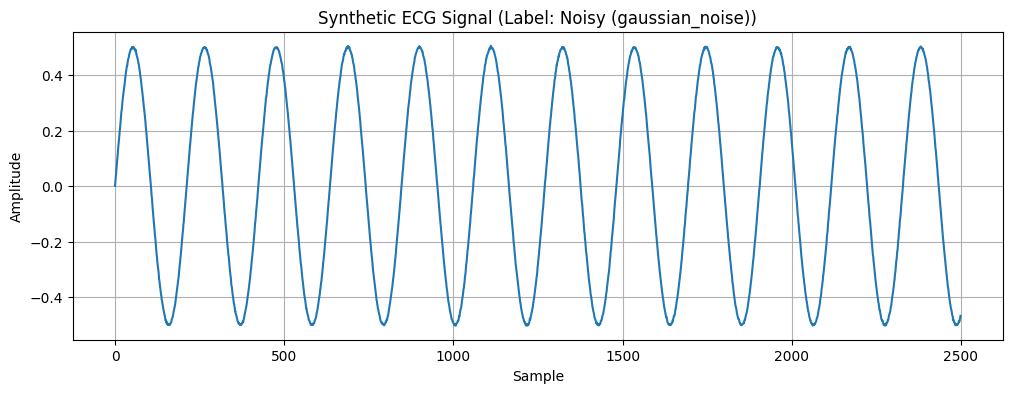

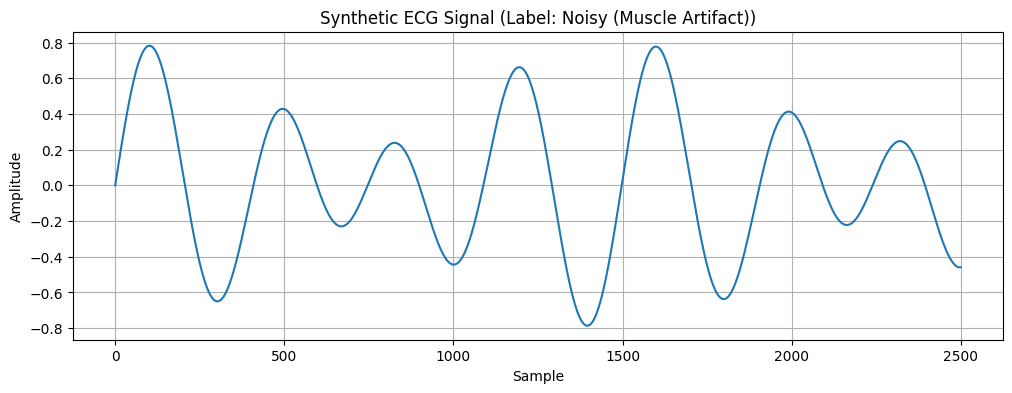

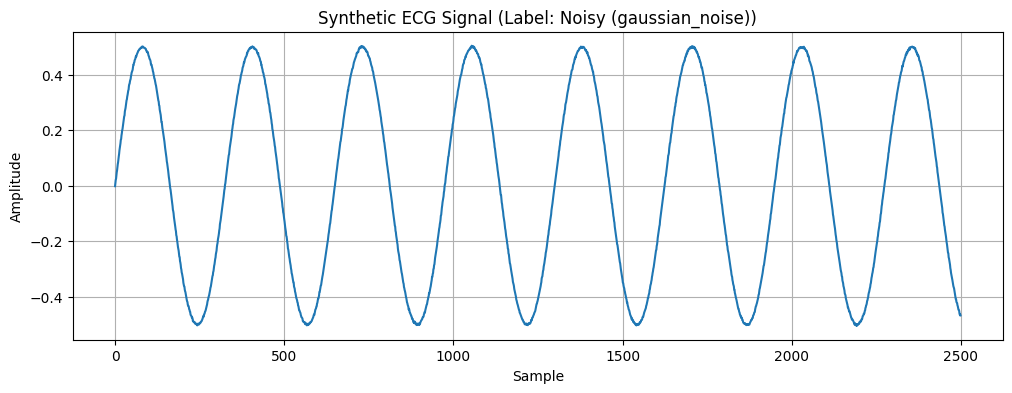

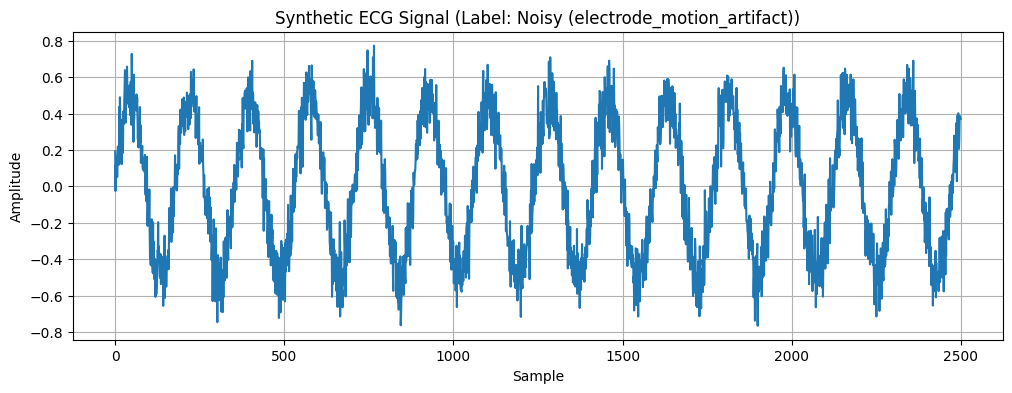

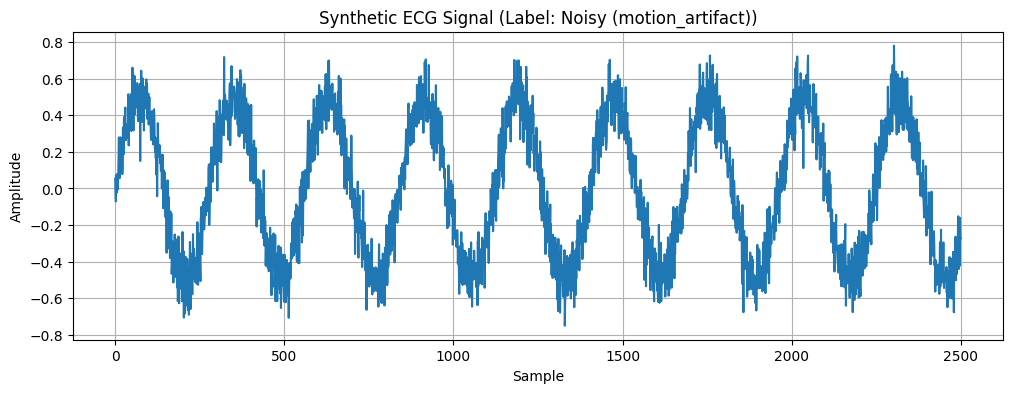

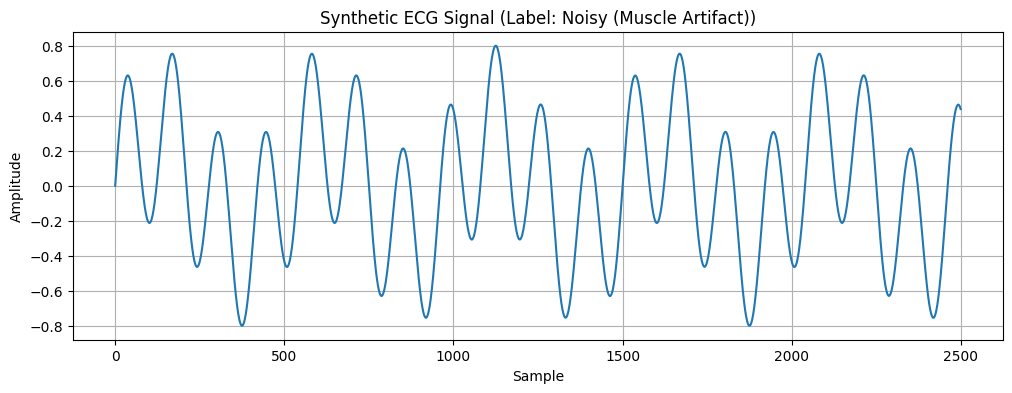

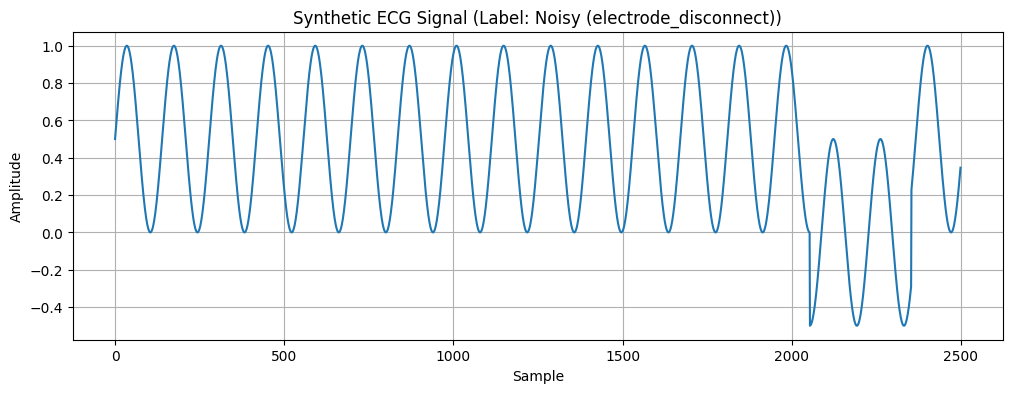

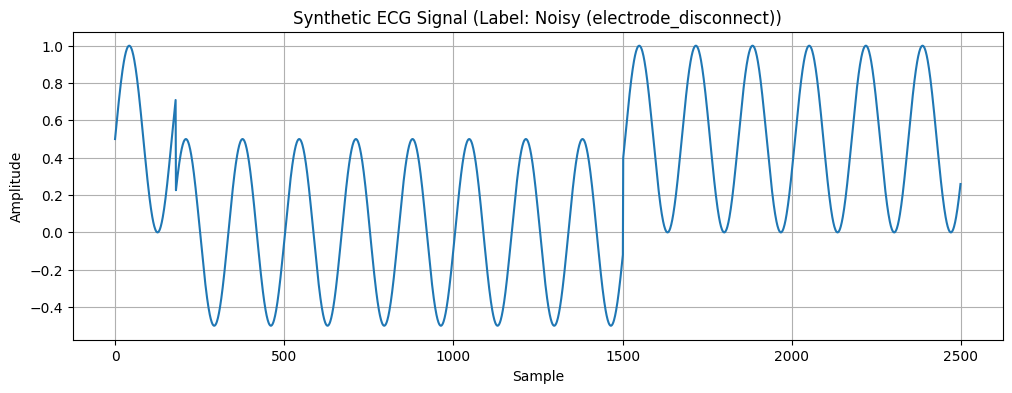

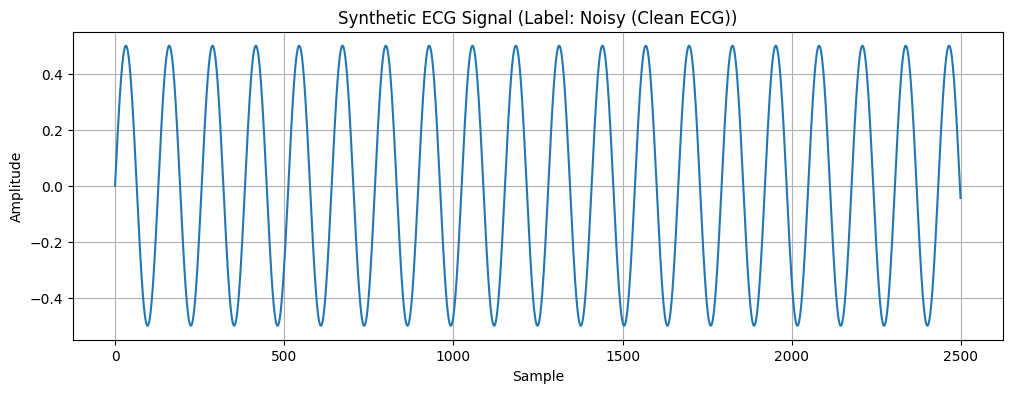

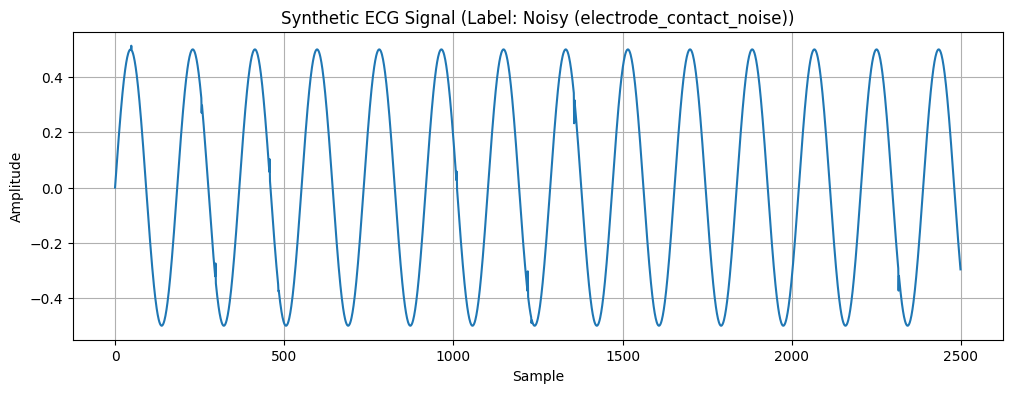

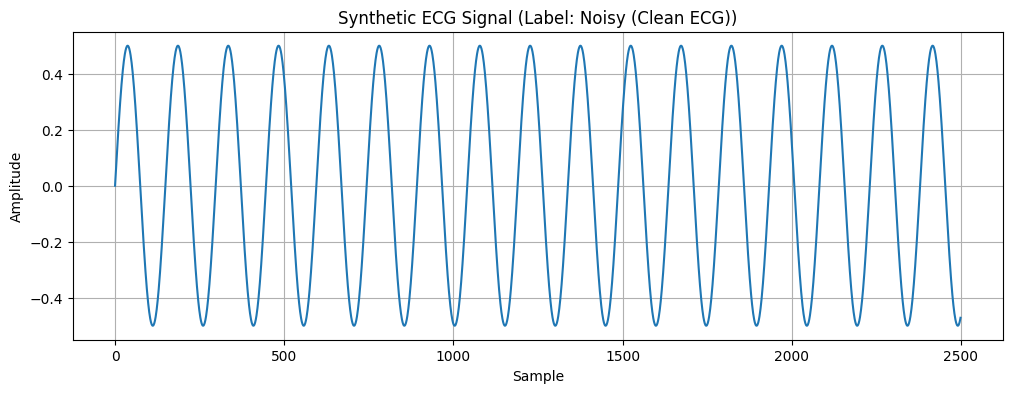

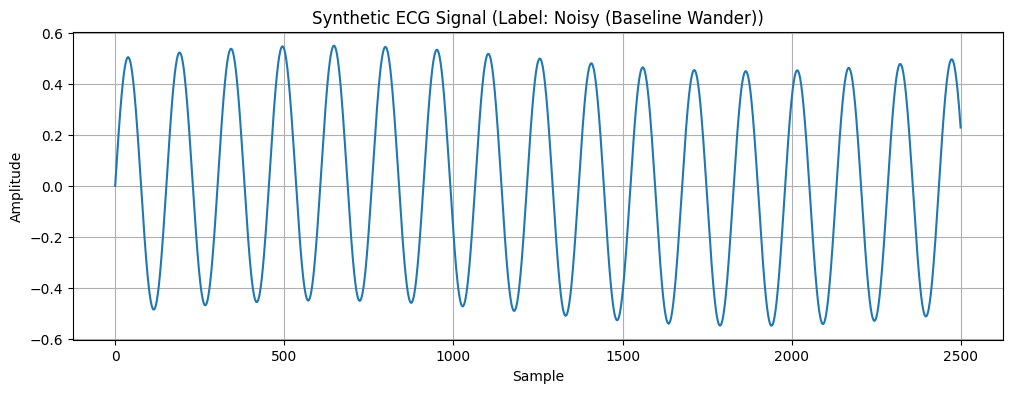

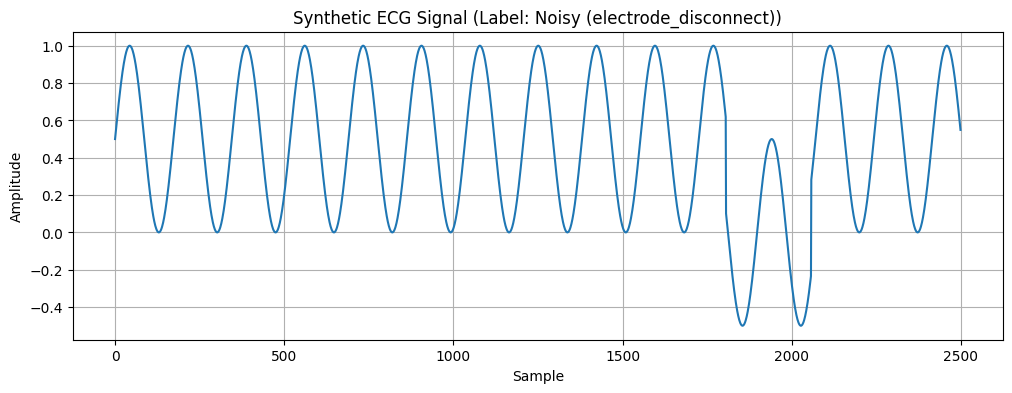

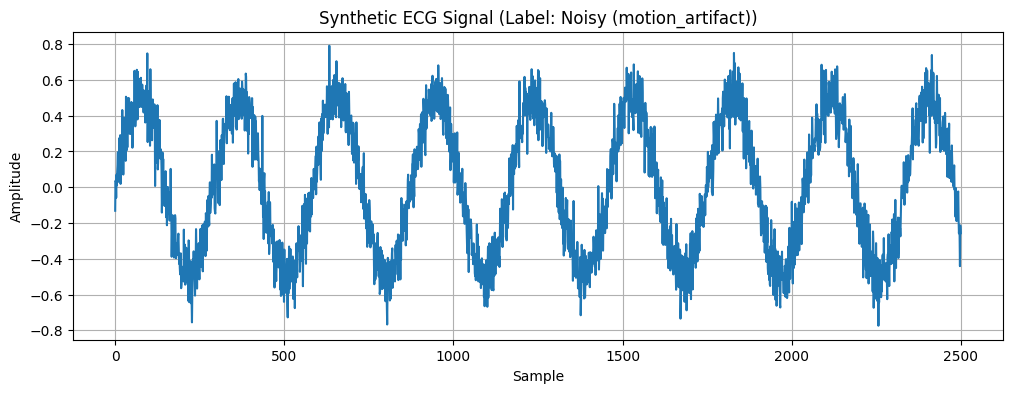

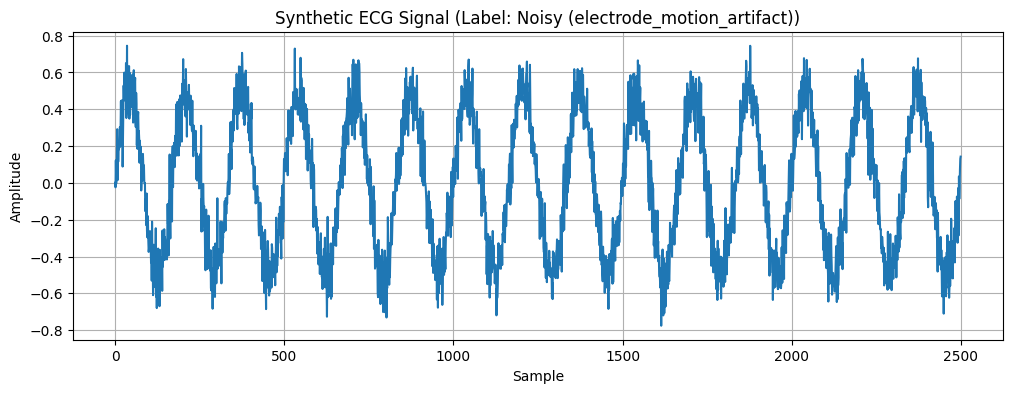

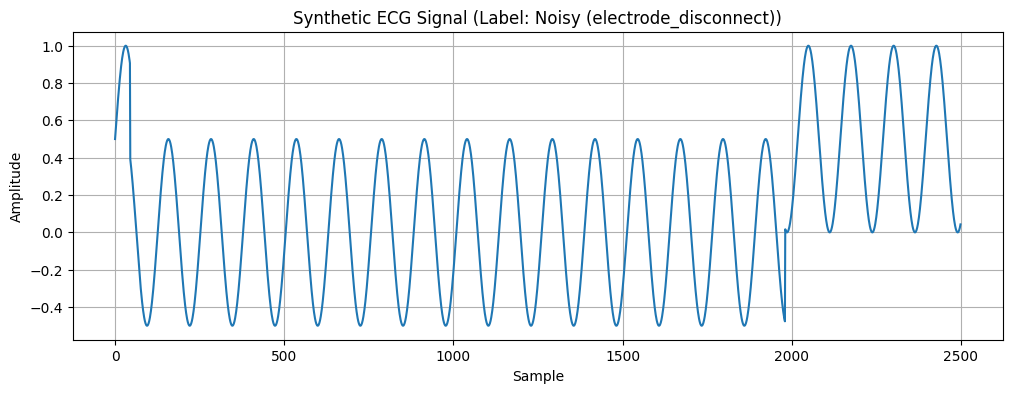

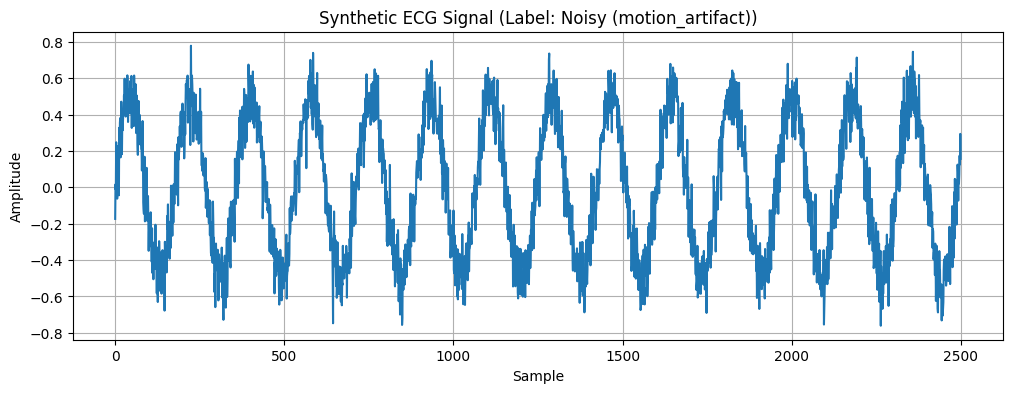

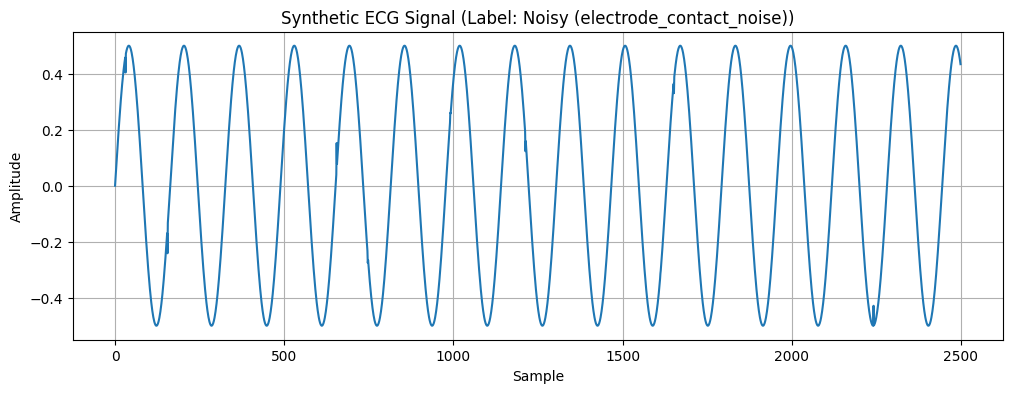

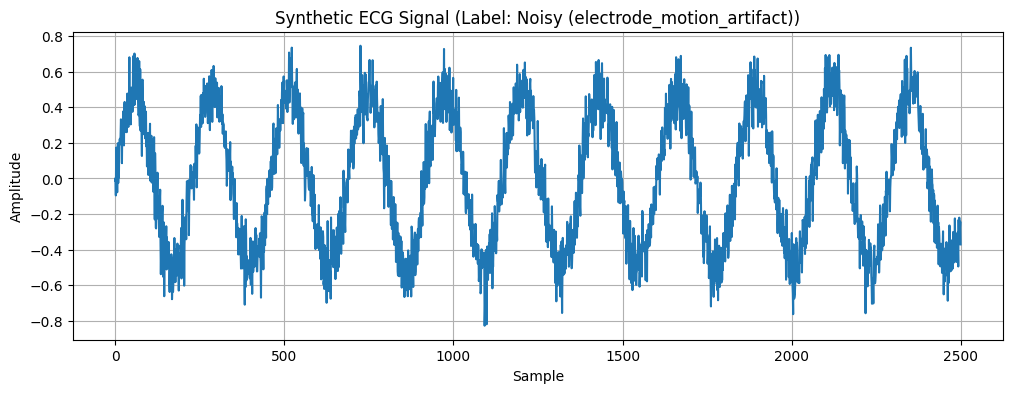

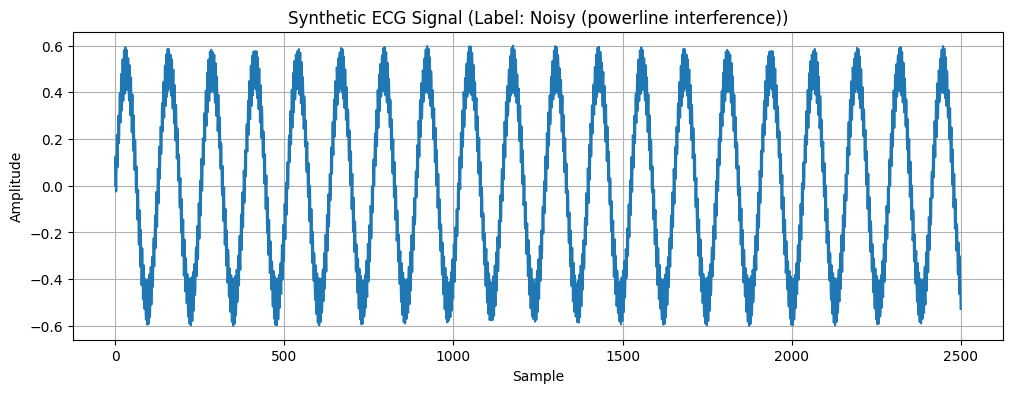

In [5]:
import matplotlib.pyplot as plt


num = 20
# Generate a synthetic dataset with labels
num_samples = num  # Number of synthetic ECG signals to generate
X, y = generate_synthetic_dataset(num_samples)

# Plot the synthetic ECG signals with labels
for i in range(num_samples):
    plt.figure(figsize=(12, 4))
    plt.plot(X[i])
    plt.title(f'Synthetic ECG Signal (Label: {y[i]})')
    plt.xlabel('Sample')
    plt.ylabel('Amplitude')
    plt.grid(True)
    plt.show()


# **Working with the files that will save the generated Signals**

**Saving the Generated ECG signals in Binary files for futher use**

In [7]:
import numpy as np

# Specify the directory where you want to save the signals and labels
save_directory = "/content/output/"

# Generate a synthetic dataset with labels
num_samples = num  # Number of synthetic ECG signals to generate
X, y = generate_synthetic_dataset(num_samples)

# Save the synthetic ECG signals and labels as NumPy binary files
for i in range(num_samples):
    # Define a unique filename for each signal and label (you can customize this)
    signal_filename = f"synthetic_ecg_{i}.npy"
    label_filename = f"label_{i}.npy"

    # Combine the save_directory and filenames to create the full paths
    signal_full_path = save_directory + signal_filename
    label_full_path = save_directory + label_filename

    # Save the signal as a NumPy binary file
    np.save(signal_full_path, X[i])

    # Save the label as a separate NumPy binary file
    np.save(label_full_path, np.array([y[i]]))

    # Print a message to confirm the saves
    print(f'Saved {signal_filename} in {save_directory}')
    print(f'Saved {label_filename} in {save_directory}')


Saved synthetic_ecg_0.npy in /content/output/
Saved label_0.npy in /content/output/
Saved synthetic_ecg_1.npy in /content/output/
Saved label_1.npy in /content/output/
Saved synthetic_ecg_2.npy in /content/output/
Saved label_2.npy in /content/output/
Saved synthetic_ecg_3.npy in /content/output/
Saved label_3.npy in /content/output/
Saved synthetic_ecg_4.npy in /content/output/
Saved label_4.npy in /content/output/
Saved synthetic_ecg_5.npy in /content/output/
Saved label_5.npy in /content/output/
Saved synthetic_ecg_6.npy in /content/output/
Saved label_6.npy in /content/output/
Saved synthetic_ecg_7.npy in /content/output/
Saved label_7.npy in /content/output/
Saved synthetic_ecg_8.npy in /content/output/
Saved label_8.npy in /content/output/
Saved synthetic_ecg_9.npy in /content/output/
Saved label_9.npy in /content/output/
Saved synthetic_ecg_10.npy in /content/output/
Saved label_10.npy in /content/output/
Saved synthetic_ecg_11.npy in /content/output/
Saved label_11.npy in /cont

**This code is Opening the generated Files and showing the signals in that file along with labels**

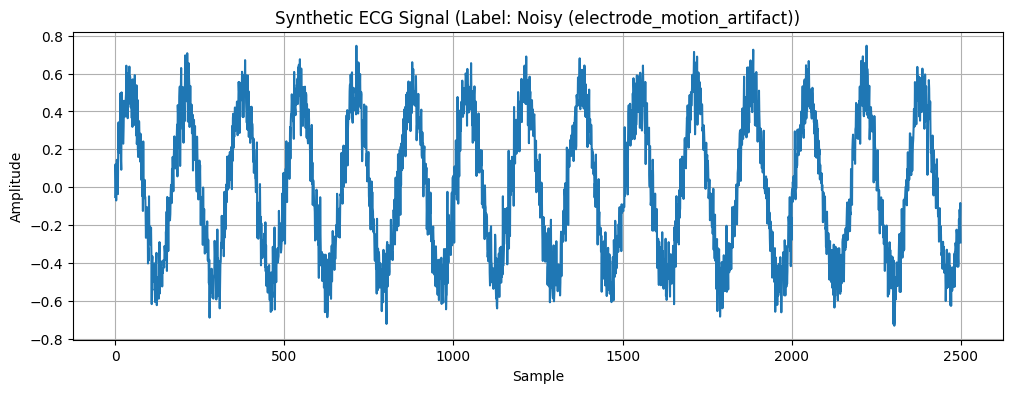

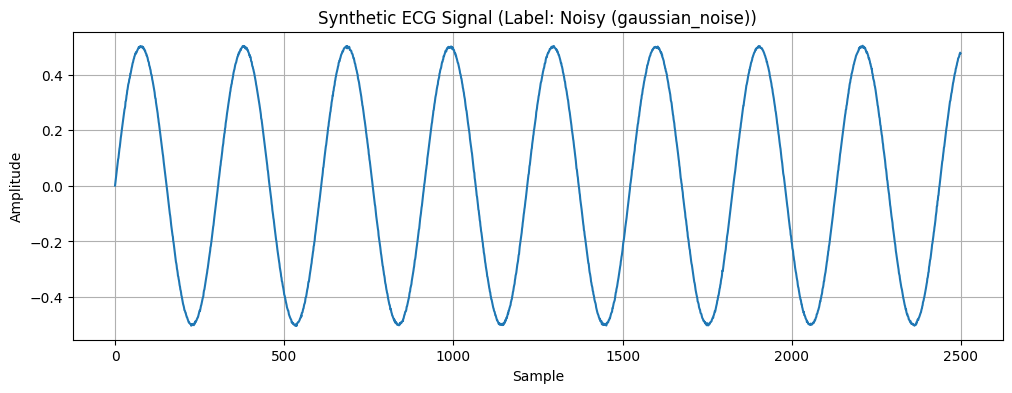

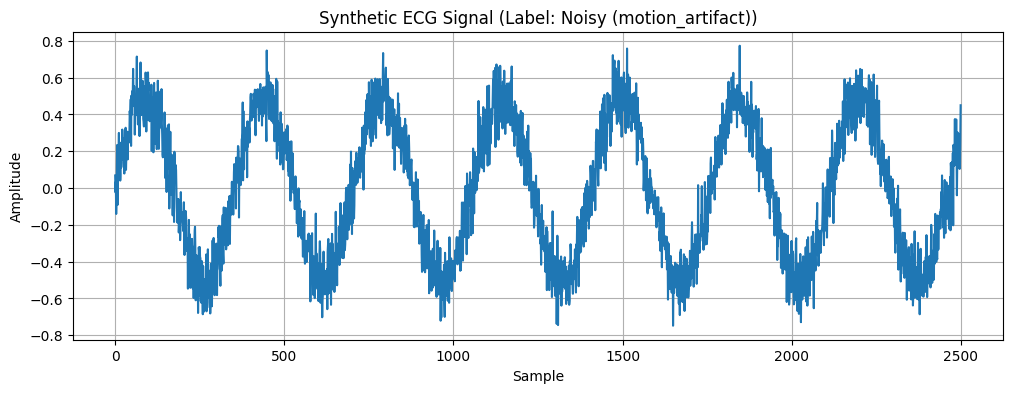

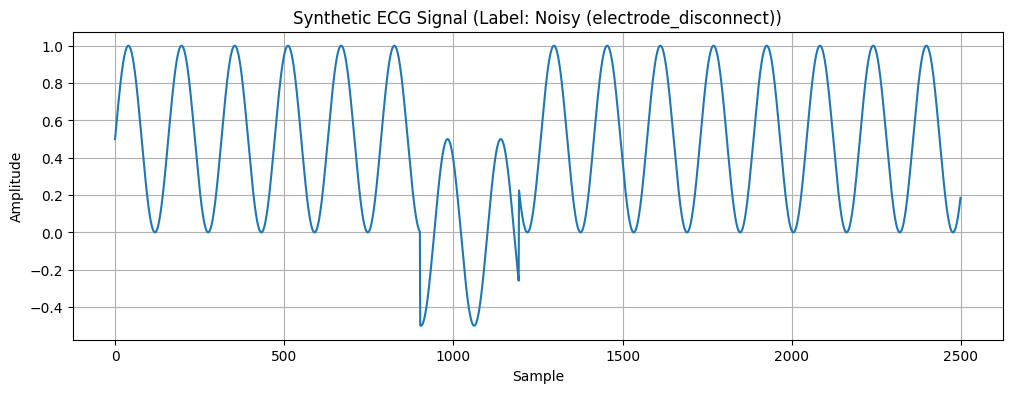

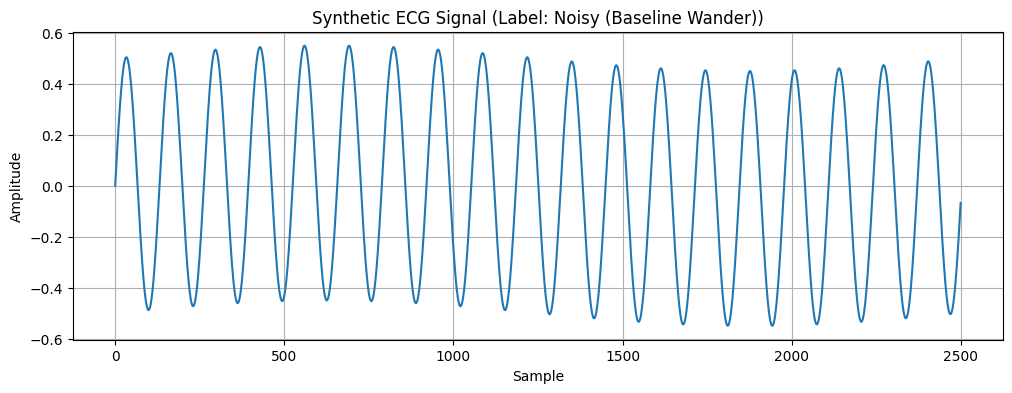

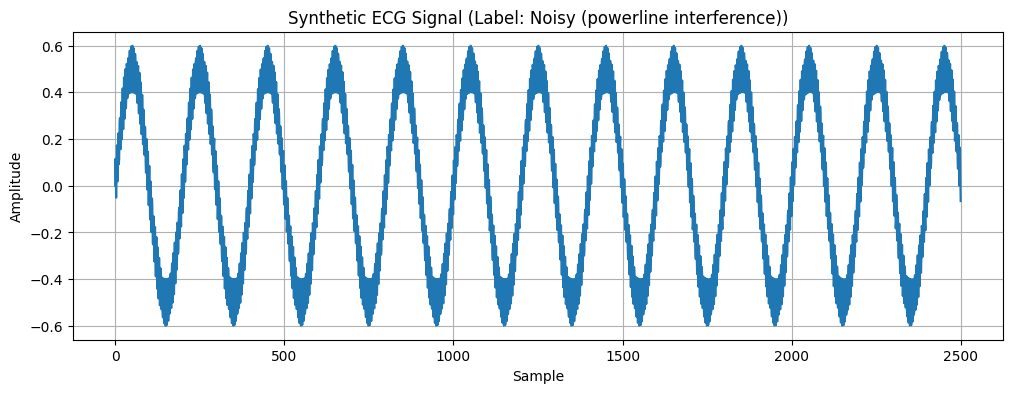

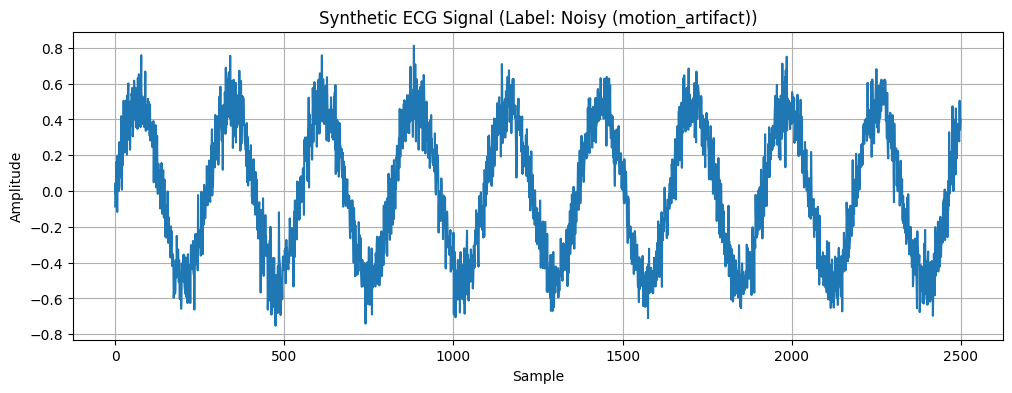

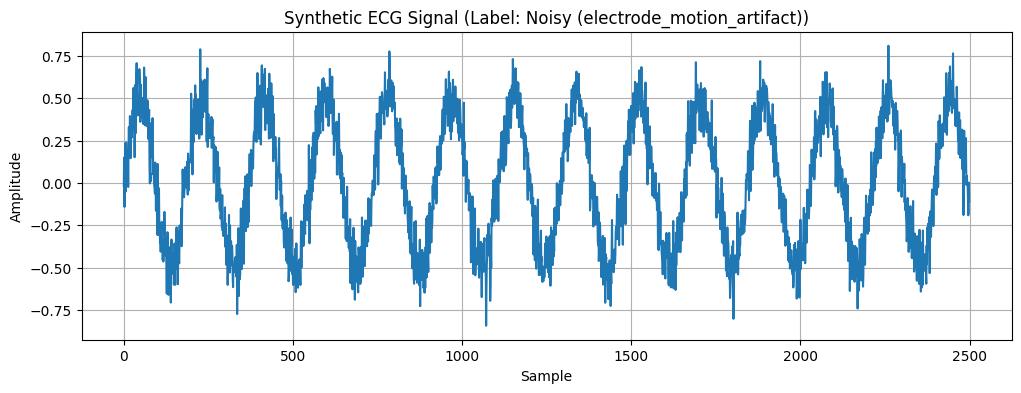

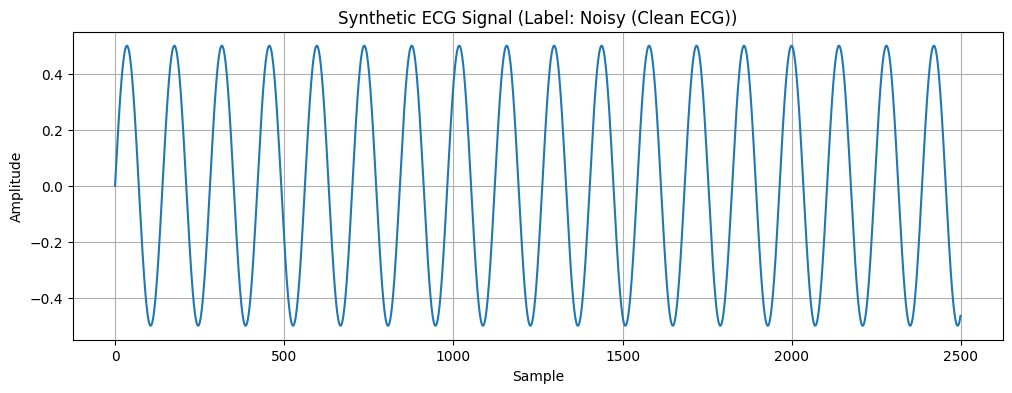

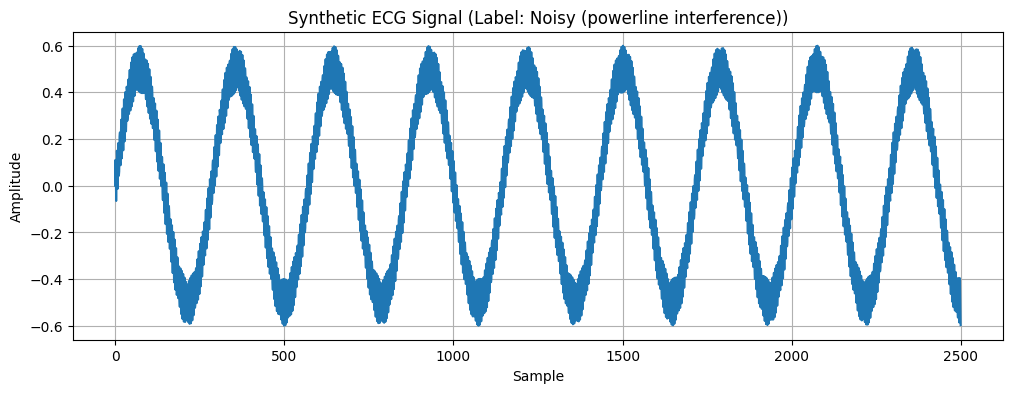

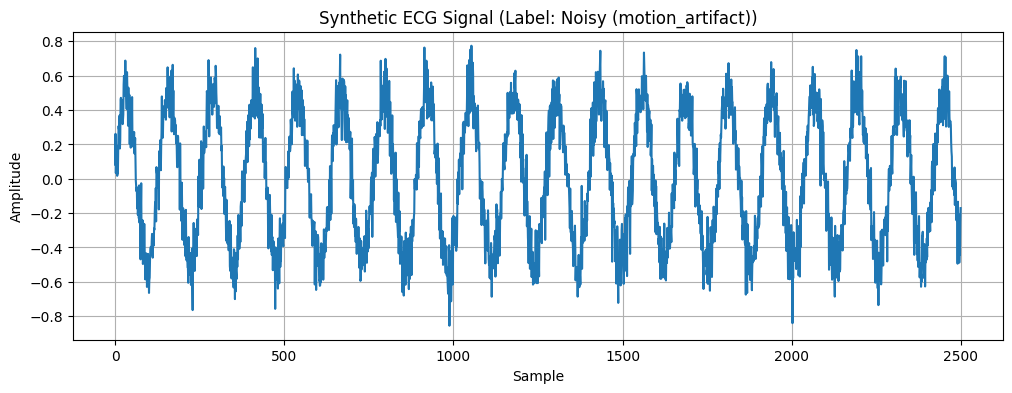

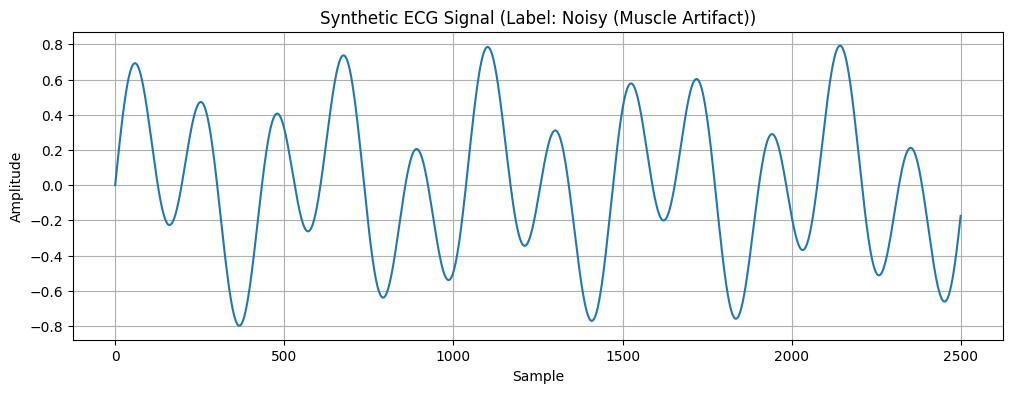

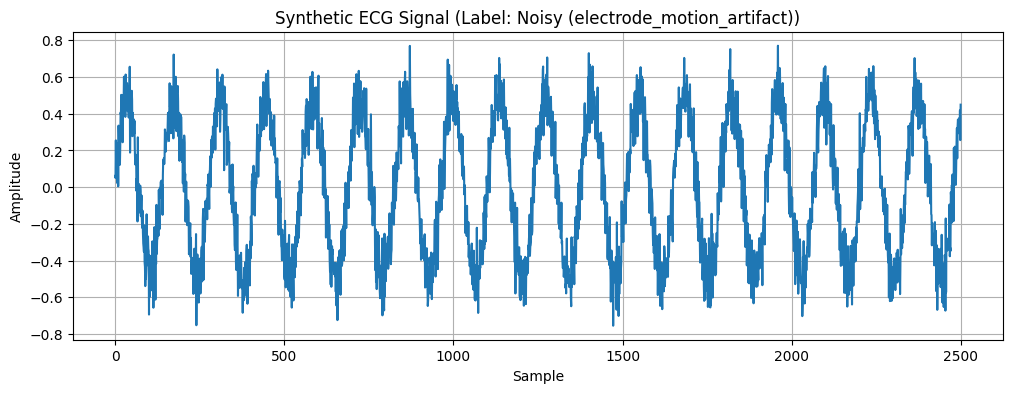

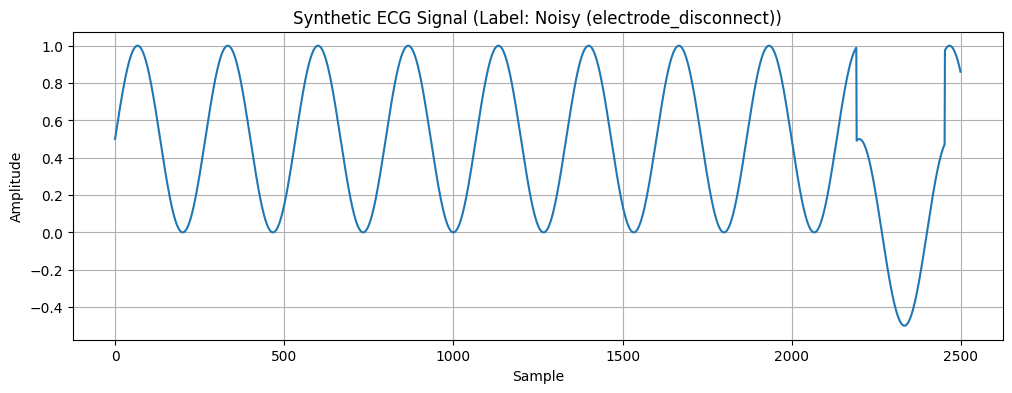

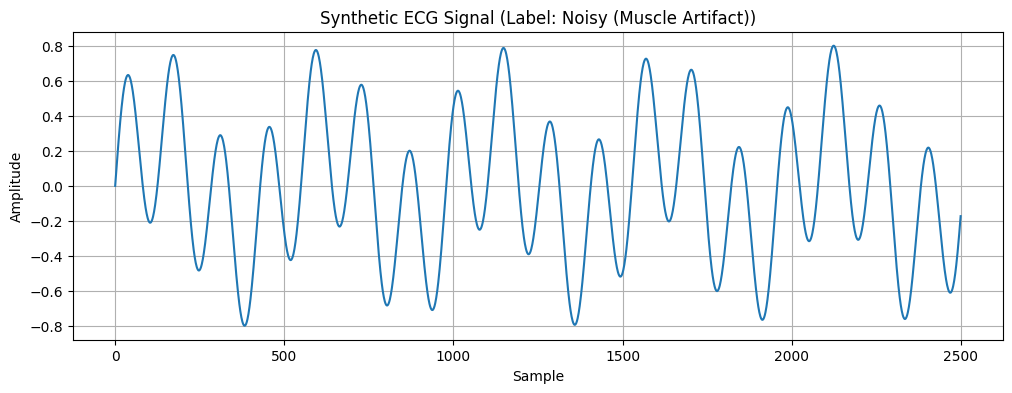

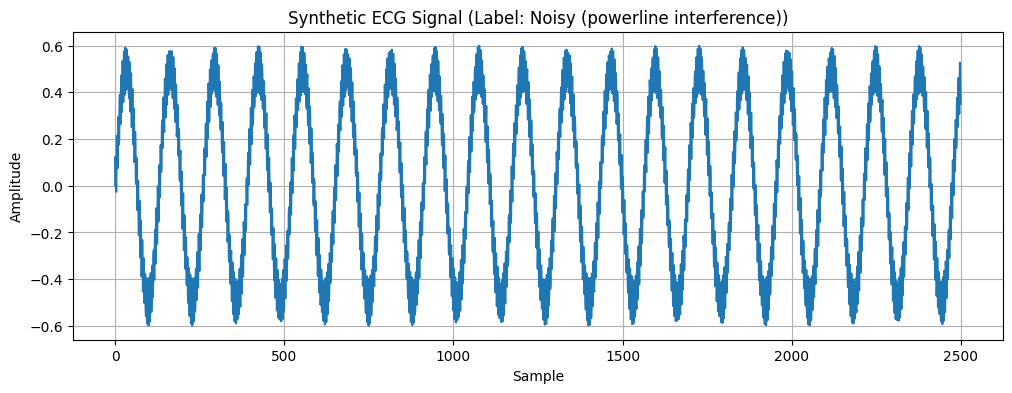

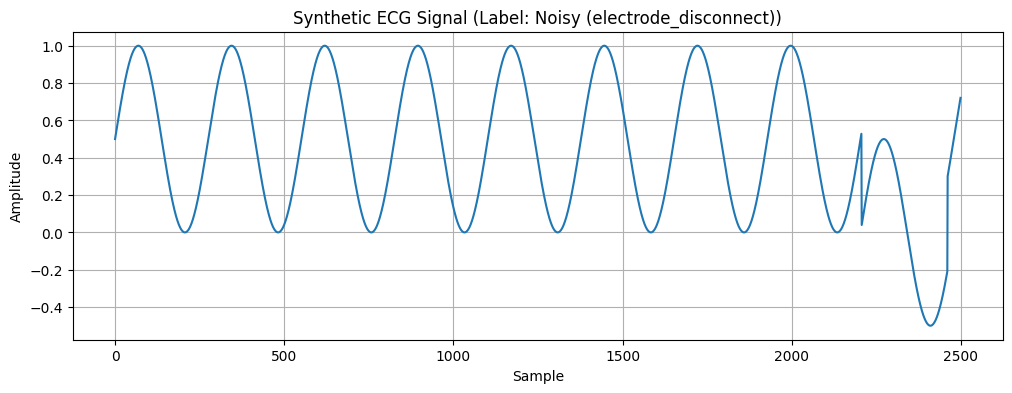

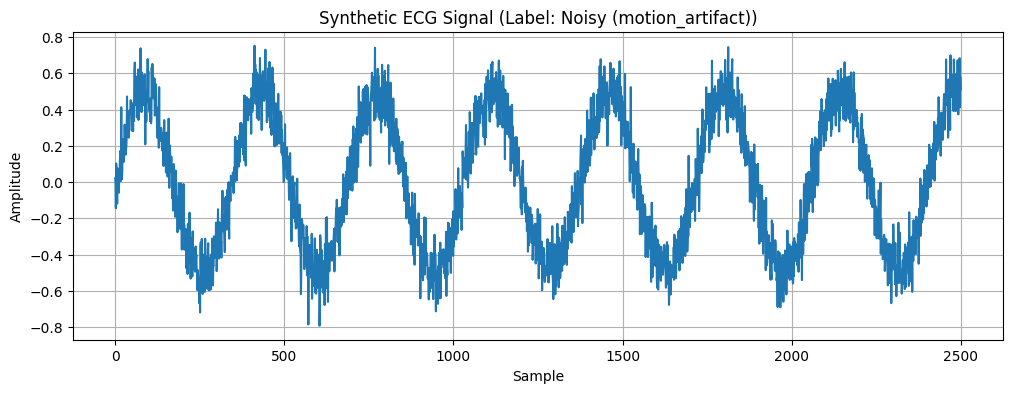

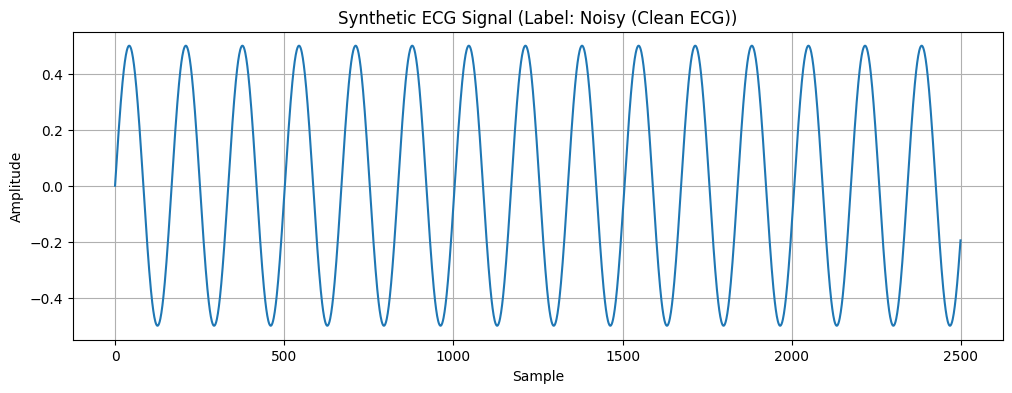

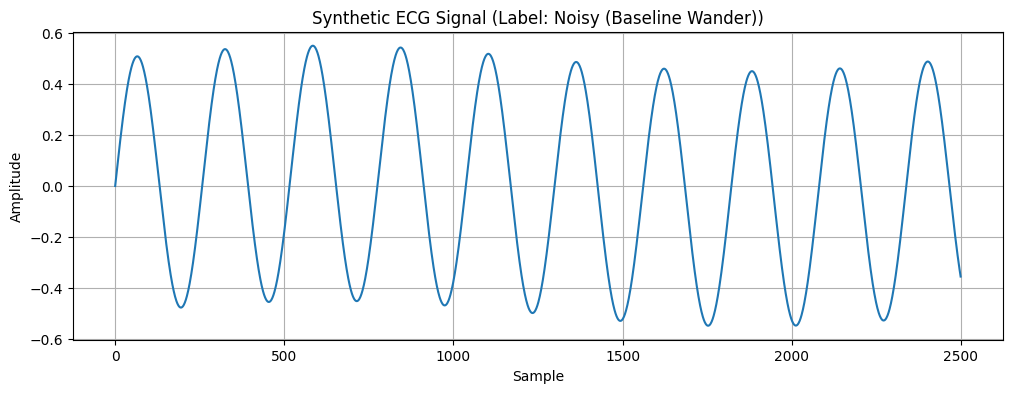

In [8]:
import numpy as np
import matplotlib.pyplot as plt

# Specify the directory where the signals and labels are saved
load_directory = "/content/output/"

# Load the synthetic ECG signals and labels
num_samples = num  # Number of synthetic ECG signals

X_loaded = []  # To store loaded signals
y_loaded = []  # To store loaded labels

for i in range(num_samples):
    # Define the filenames for signals and labels
    signal_filename = f"synthetic_ecg_{i}.npy"
    label_filename = f"label_{i}.npy"

    # Combine the load_directory and filenames to create the full paths
    signal_full_path = load_directory + signal_filename
    label_full_path = load_directory + label_filename

    # Load the signal and label from the respective files
    signal = np.load(signal_full_path)
    label = np.load(label_full_path)

    # Append the loaded signal and label to the lists
    X_loaded.append(signal)
    y_loaded.append(label[0])  # Extract the label from the 1D array

# Plot the loaded synthetic ECG signals with labels
for i in range(num_samples):
    plt.figure(figsize=(12, 4))
    plt.plot(X_loaded[i])
    plt.title(f'Synthetic ECG Signal (Label: {y_loaded[i]})')
    plt.xlabel('Sample')
    plt.ylabel('Amplitude')
    plt.grid(True)
    plt.show()


# **Showing the Clean and Noisy parts**

**This code is showing the noisy and clean part of the signal**

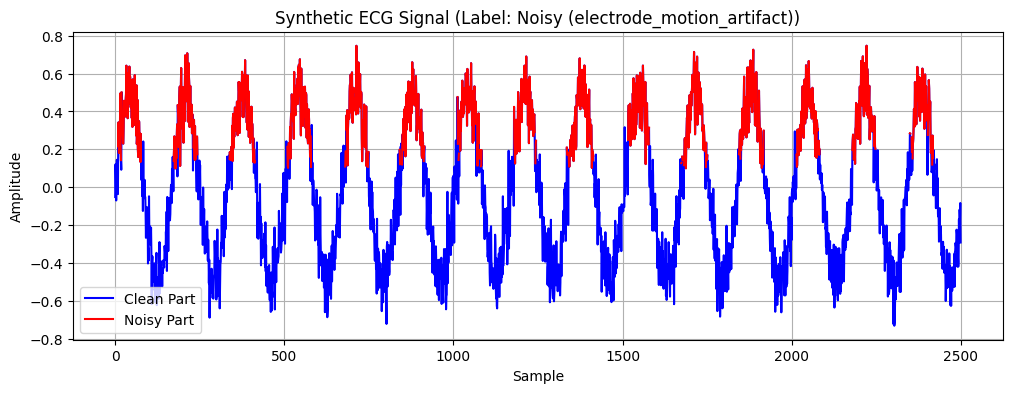

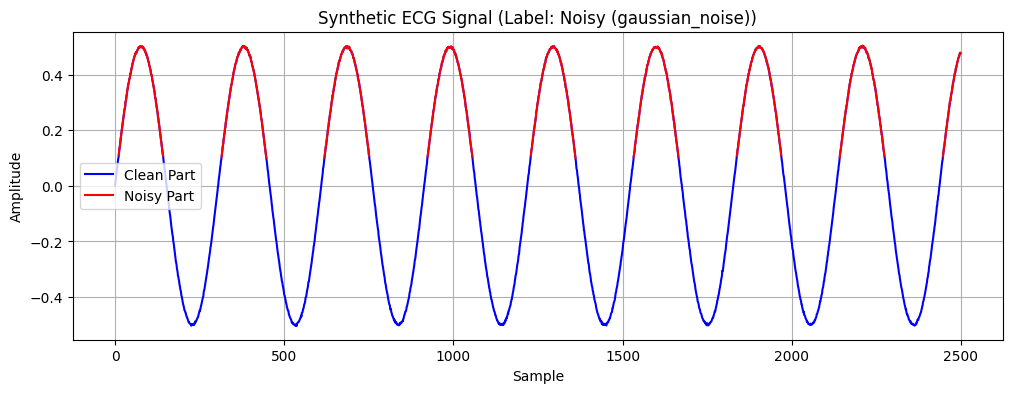

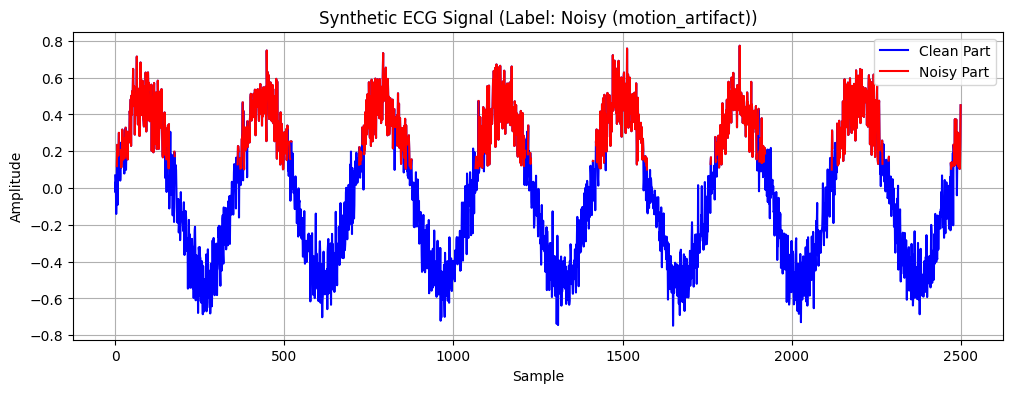

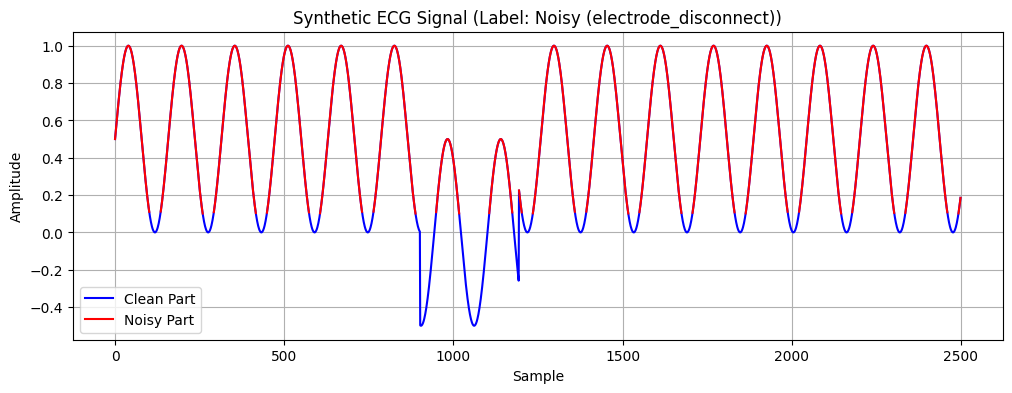

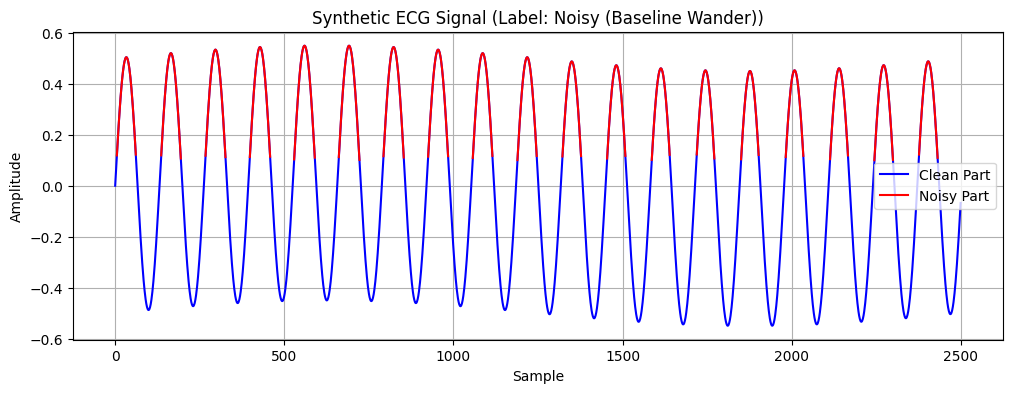

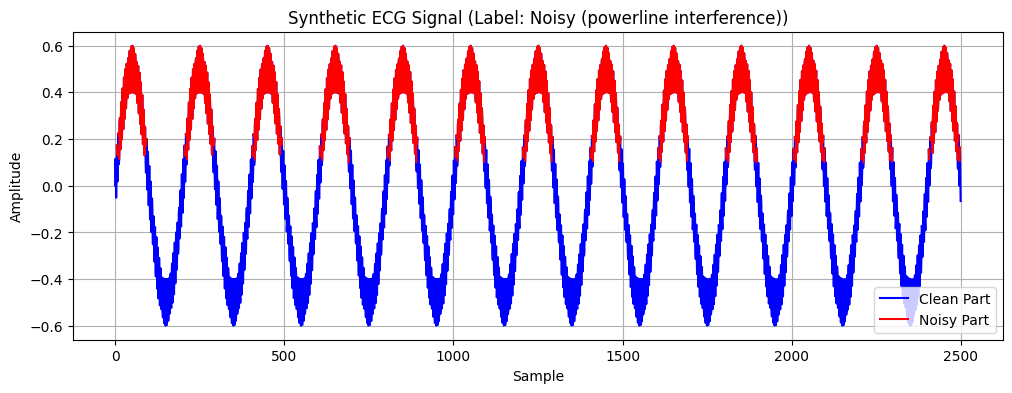

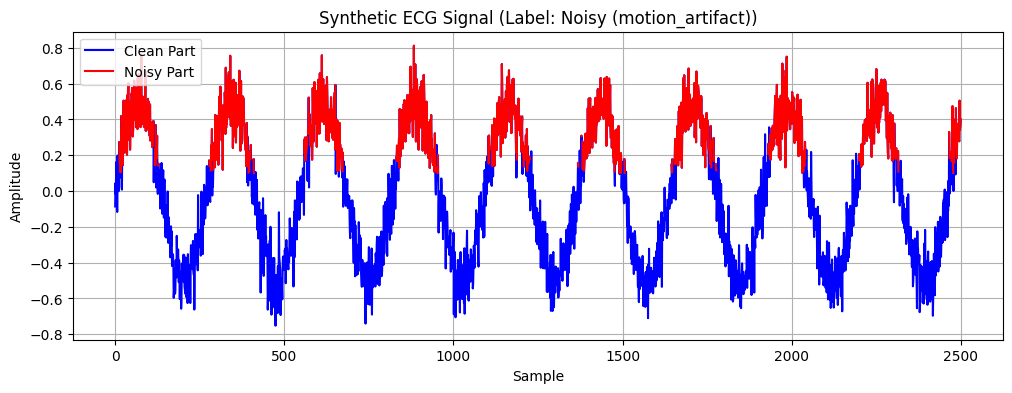

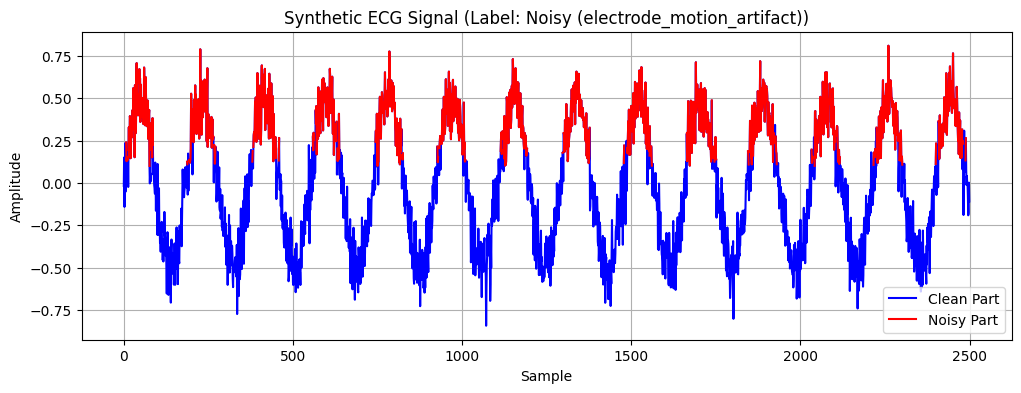

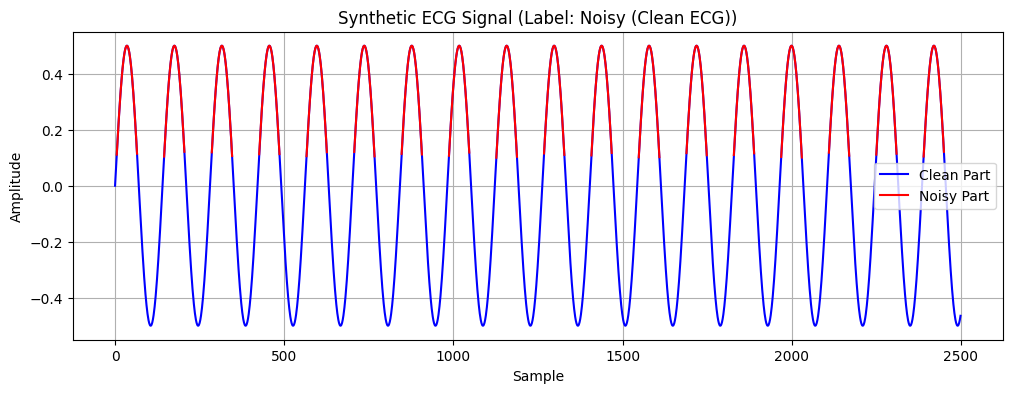

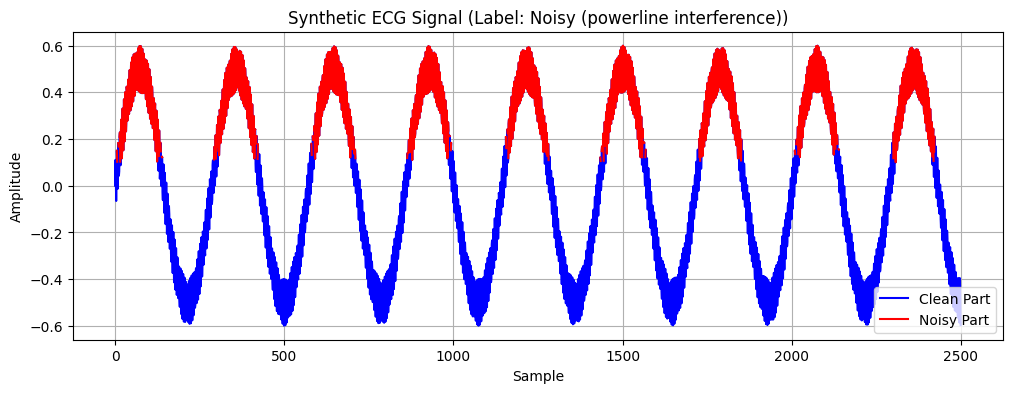

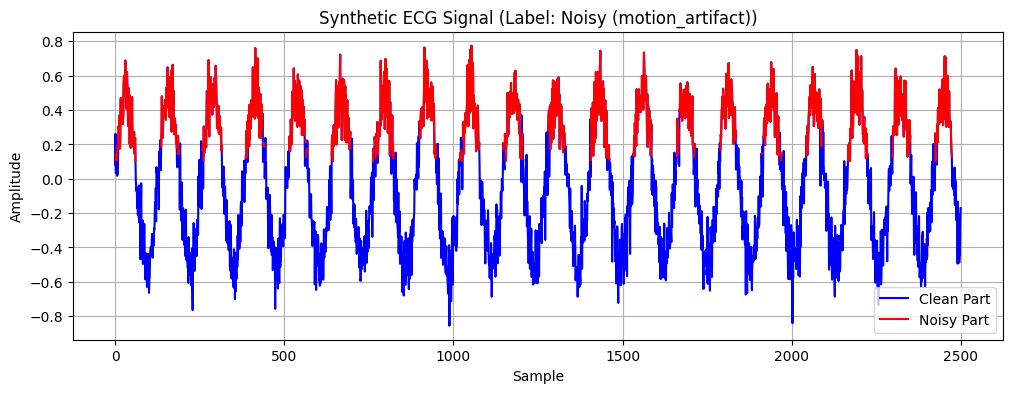

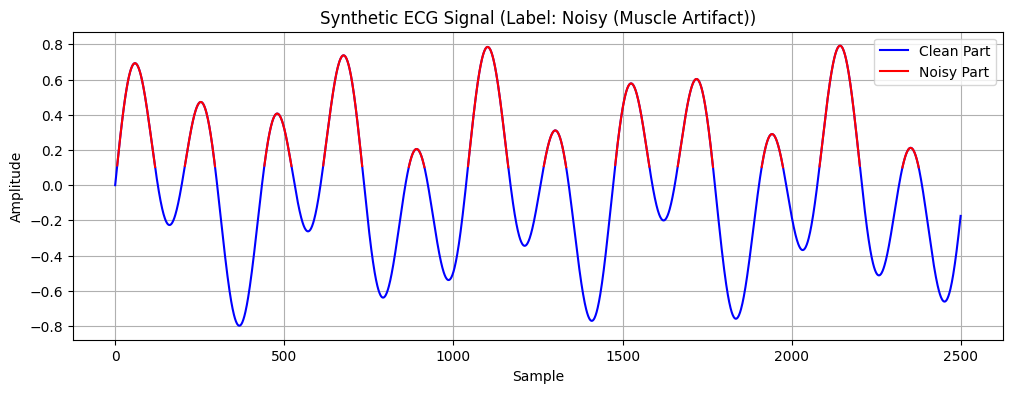

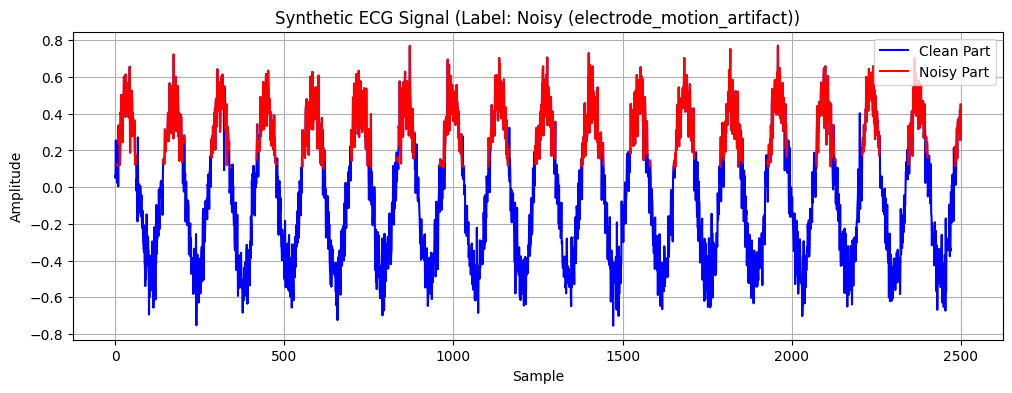

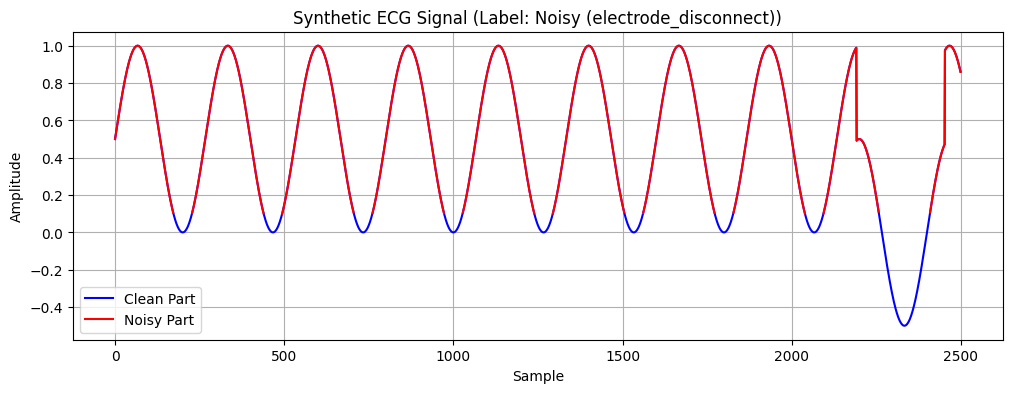

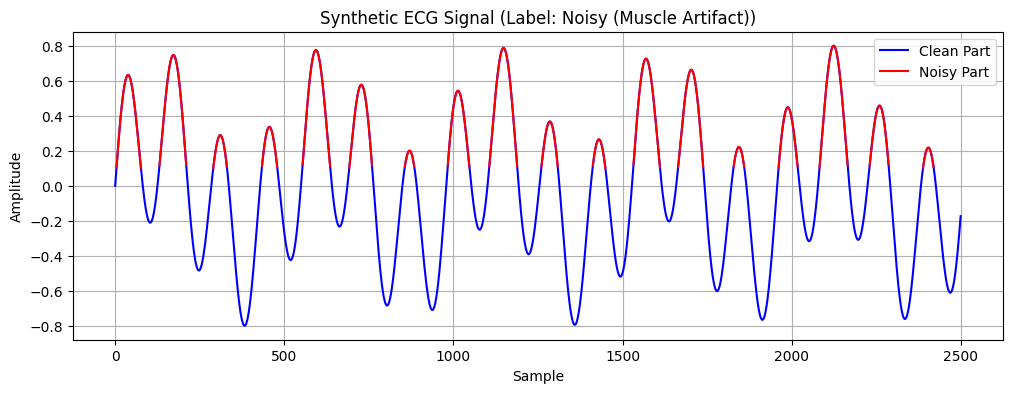

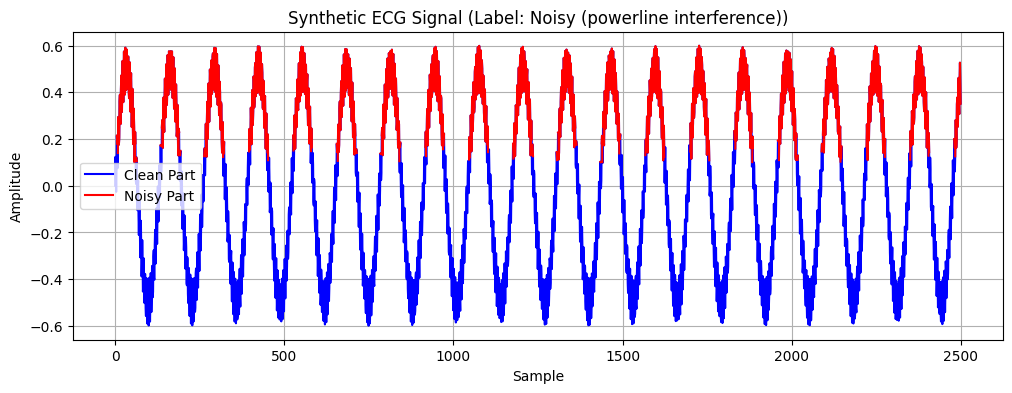

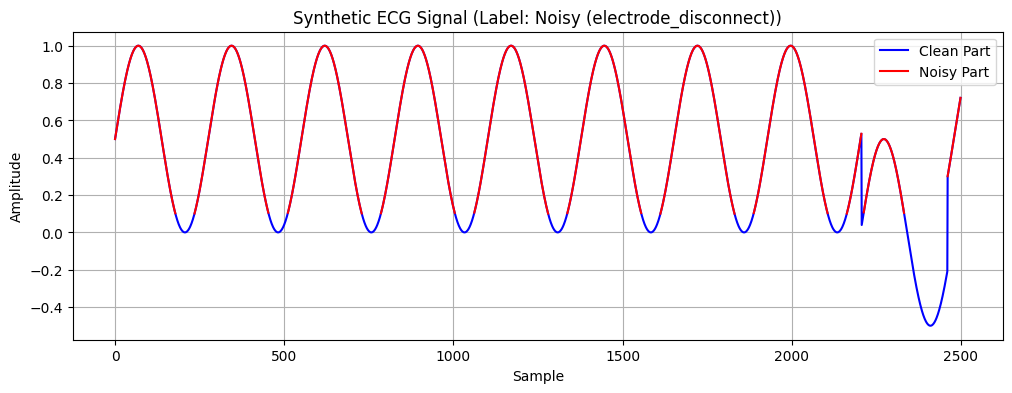

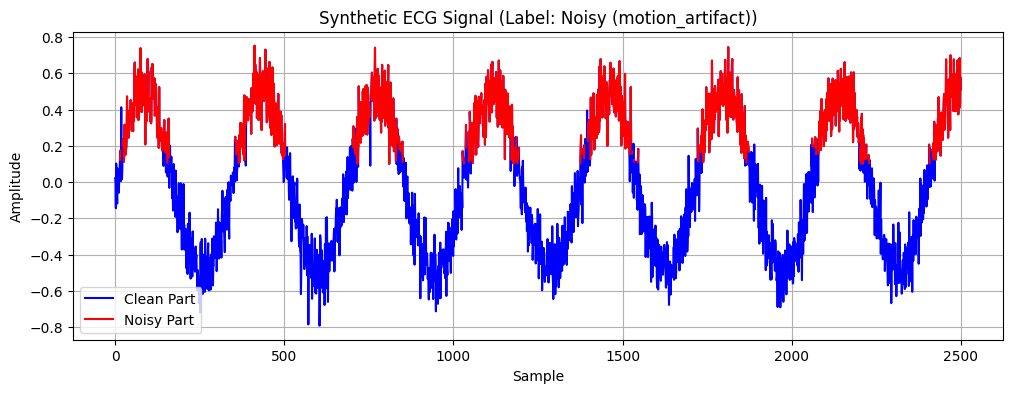

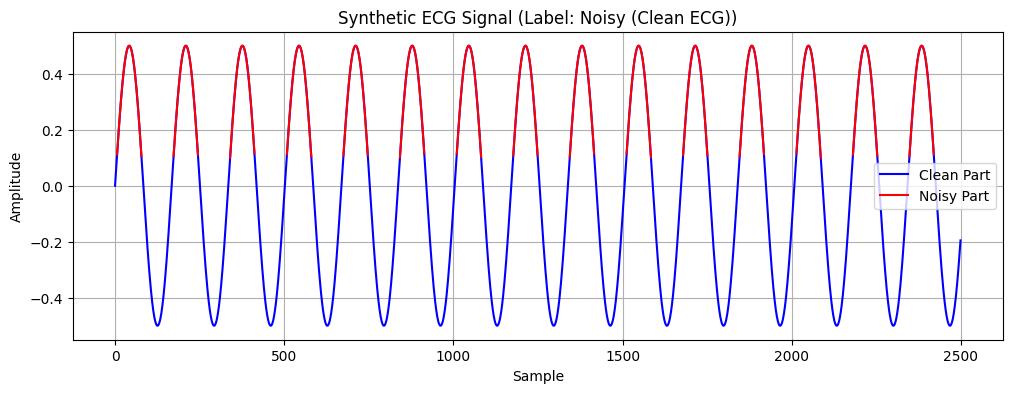

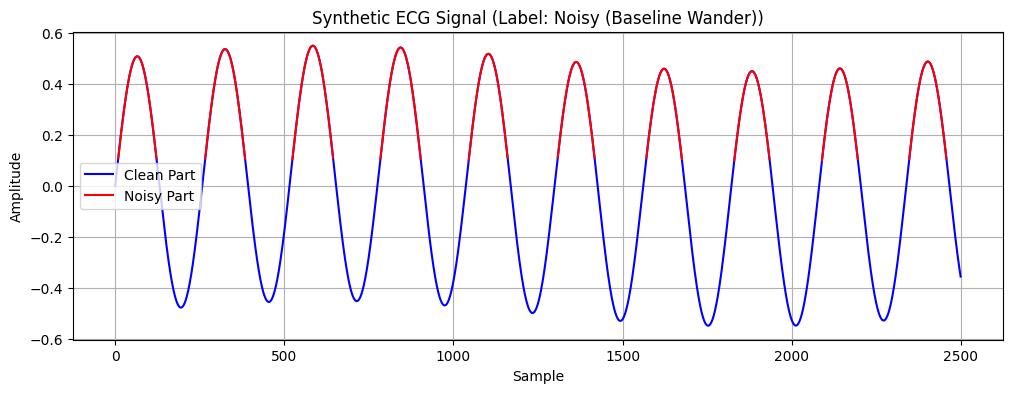

In [9]:
import numpy as np
import matplotlib.pyplot as plt

# Specify the directory where the signals and labels are saved
load_directory = "/content/output/"

# Load the synthetic ECG signals and labels
num_samples = num  # Number of synthetic ECG signals

X_loaded = []  # To store loaded signals
y_loaded = []  # To store loaded labels

for i in range(num_samples):
    # Define the filenames for signals and labels
    signal_filename = f"synthetic_ecg_{i}.npy"
    label_filename = f"label_{i}.npy"

    # Combine the load_directory and filenames to create the full paths
    signal_full_path = load_directory + signal_filename
    label_full_path = load_directory + label_filename

    # Load the signal and label from the respective files
    signal = np.load(signal_full_path)
    label = np.load(label_full_path)

    # Append the loaded signal and label to the lists
    X_loaded.append(signal)
    y_loaded.append(label[0])  # Extract the label from the 1D array

# Plot the loaded synthetic ECG signals with clean and noisy parts in the same figure
for i in range(num_samples):
    plt.figure(figsize=(12, 4))

    # Plot the clean part of the signal in blue
    plt.plot(X_loaded[i], label='Clean Part', color='blue')

    # Identify the noisy part of the signal by thresholding (adjust the threshold as needed)
    noisy_threshold = 0.1
    noisy_part = np.where(X_loaded[i] > noisy_threshold, X_loaded[i], np.nan)

    # Plot the noisy part of the signal in red
    plt.plot(noisy_part, label='Noisy Part', color='red')

    plt.title(f'Synthetic ECG Signal (Label: {y_loaded[i]})')
    plt.xlabel('Sample')
    plt.ylabel('Amplitude')
    plt.grid(True)
    plt.legend()
    plt.show()


**This code shows the noisy peaks of the signals**

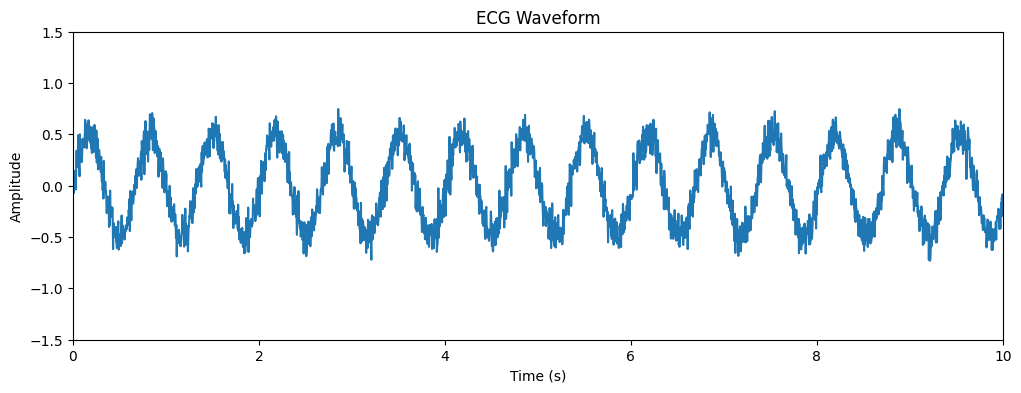

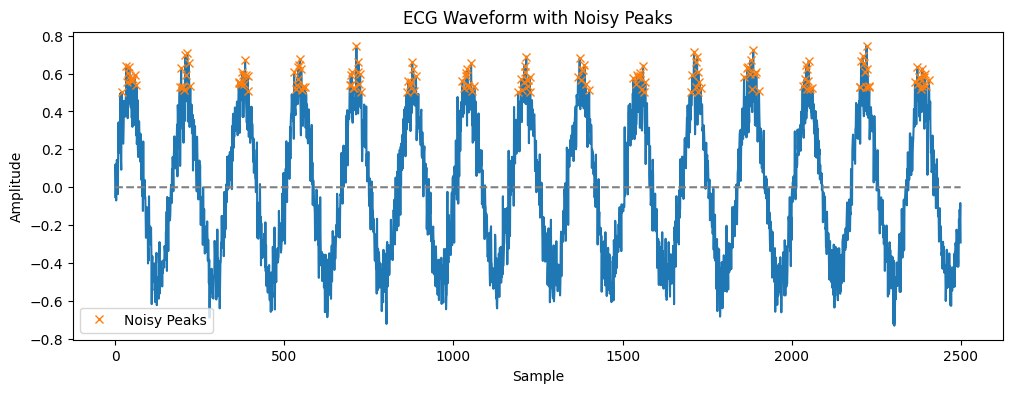

ECG Signal Quality for synthetic_ecg_0.npy: Barely acceptable


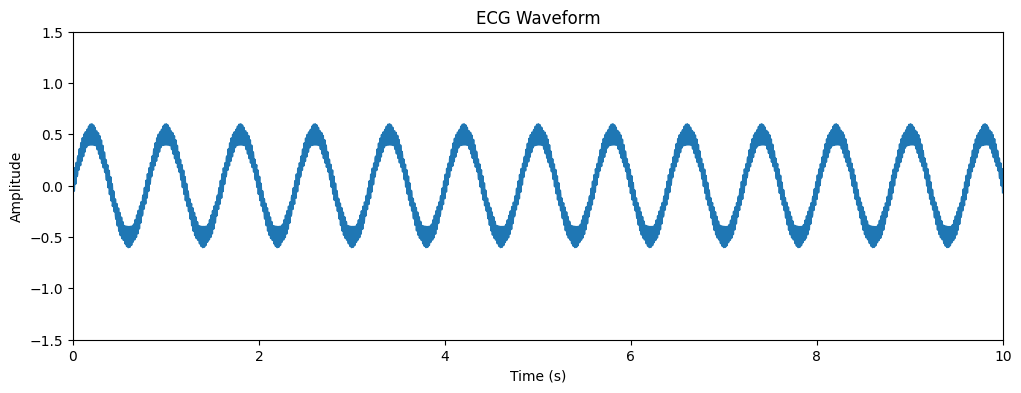

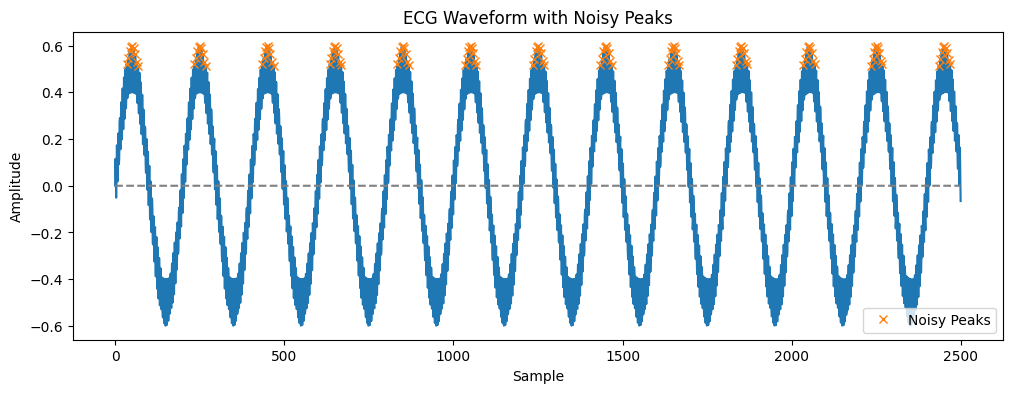

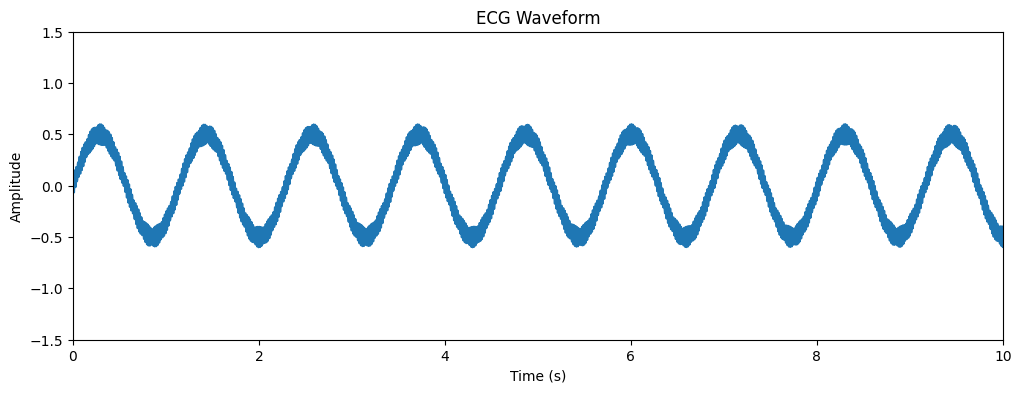

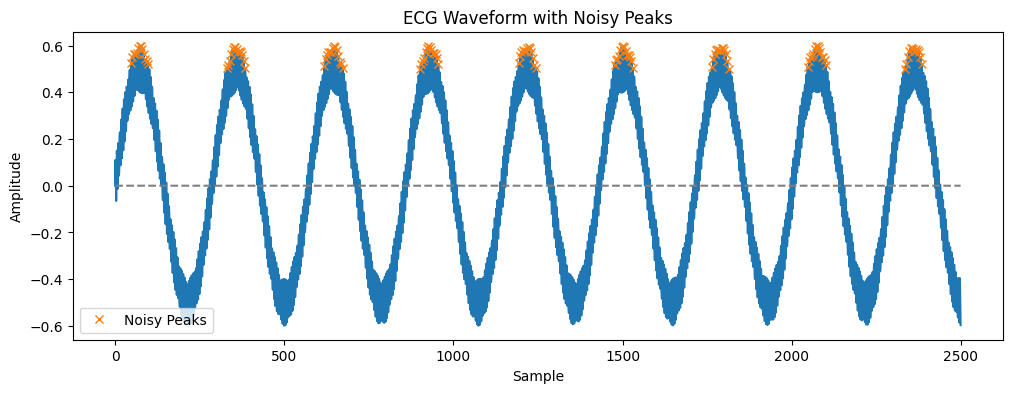

 
Skipping label_6.npy: Invalid or non-numeric data


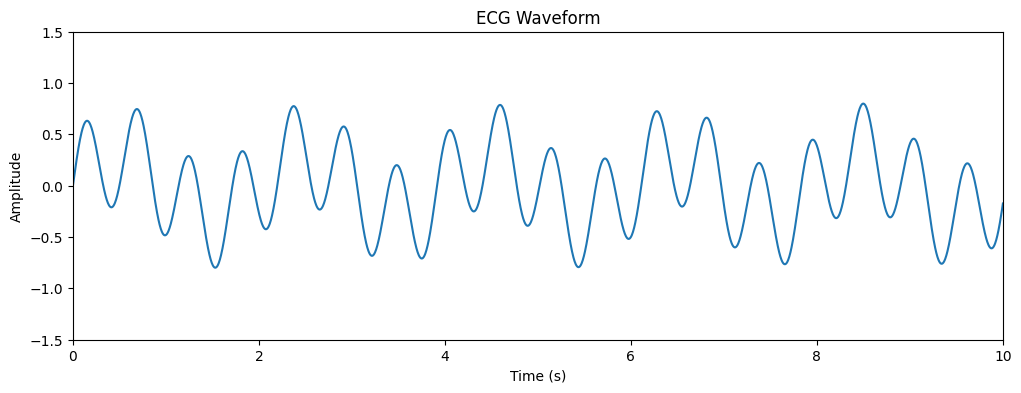

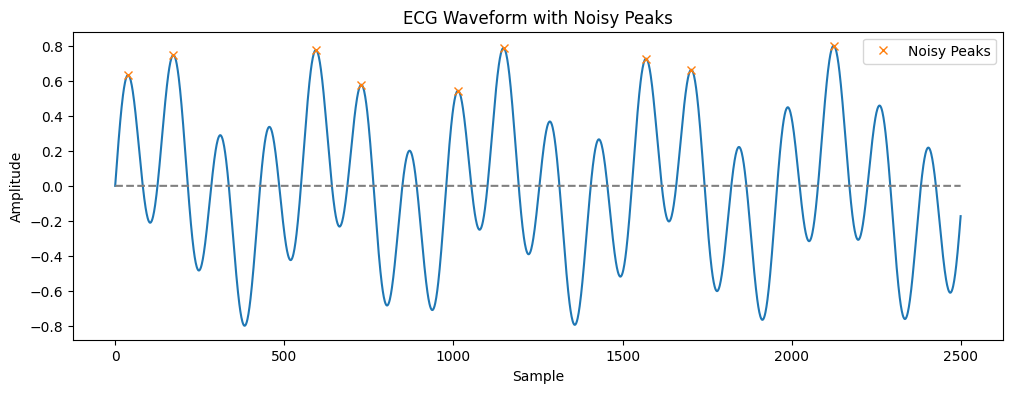

ECG Signal Quality for synthetic_ecg_14.npy: Barely acceptable
Skipping label_10.npy: Invalid or non-numeric data


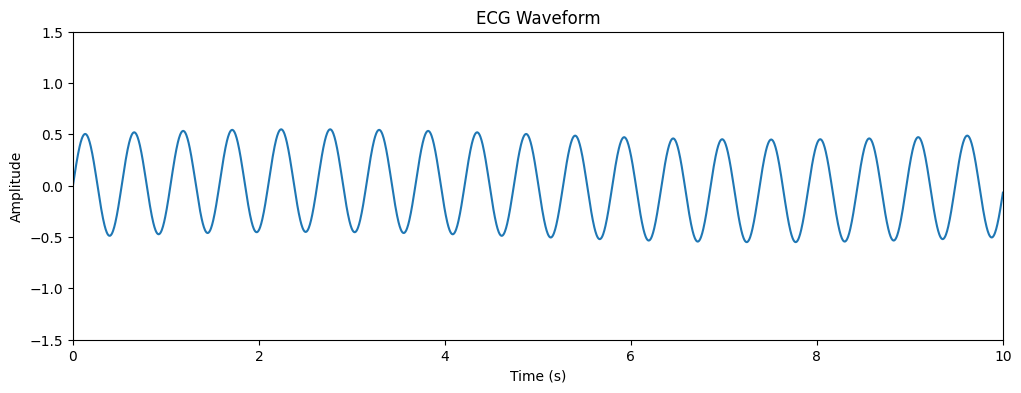

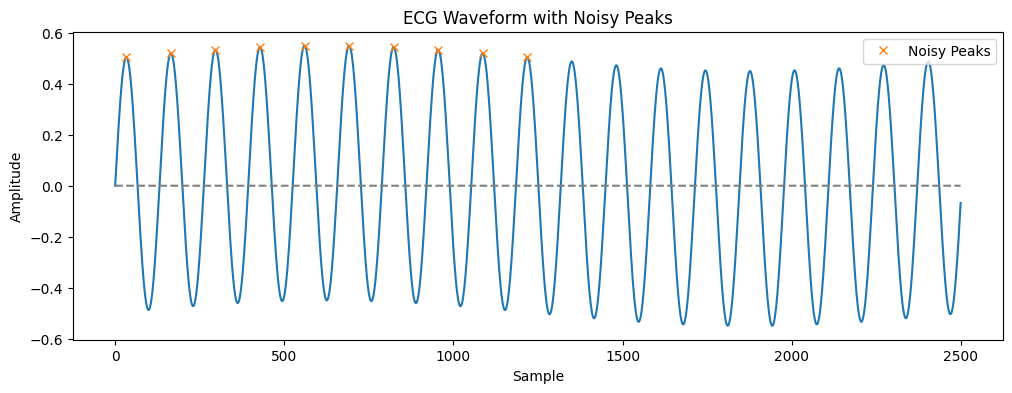

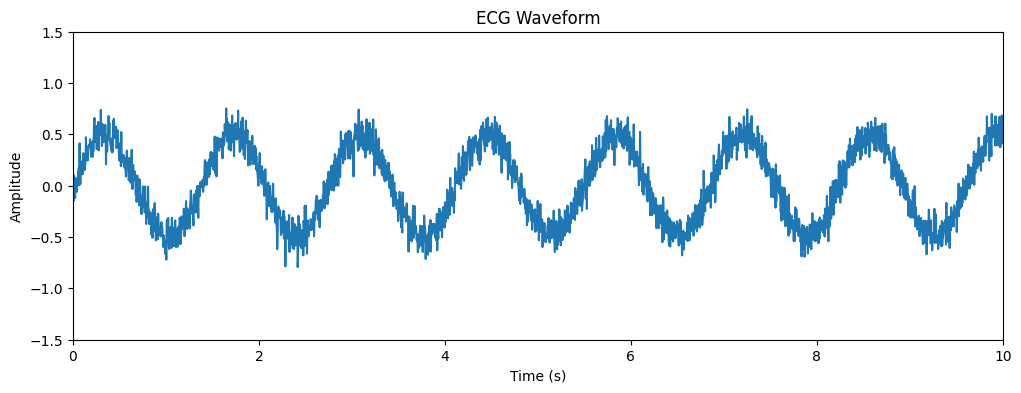

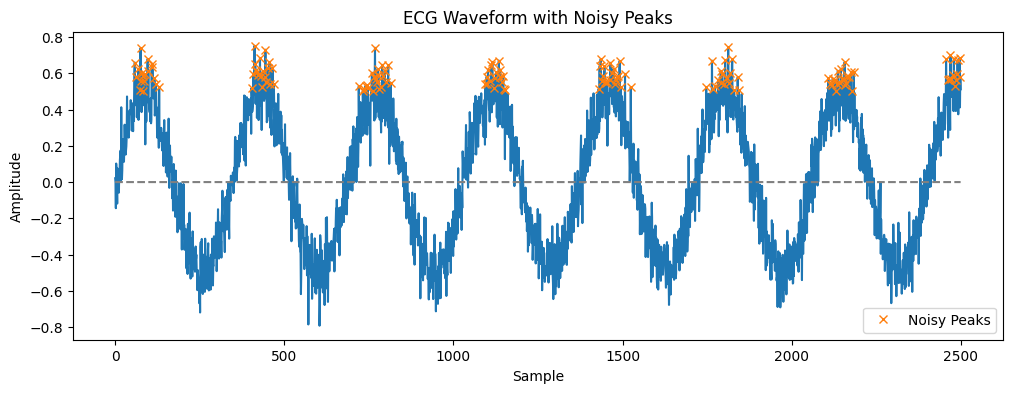

ECG Signal Quality for synthetic_ecg_17.npy: Barely acceptable
Skipping label_14.npy: Invalid or non-numeric data


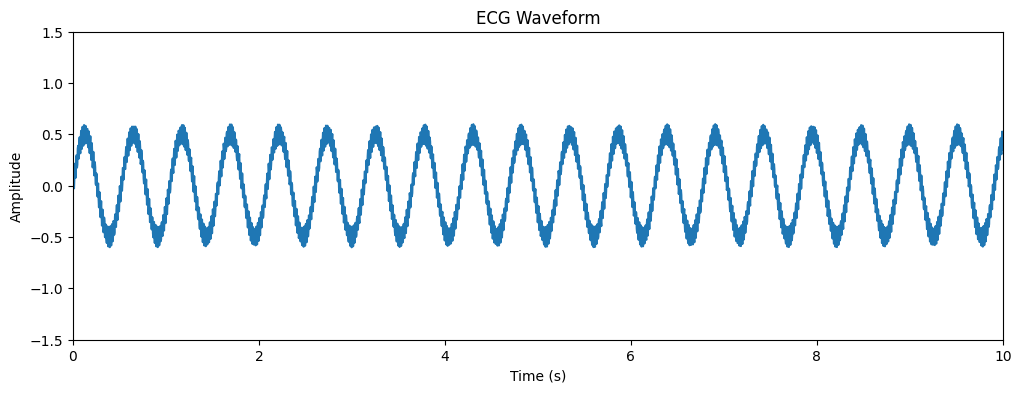

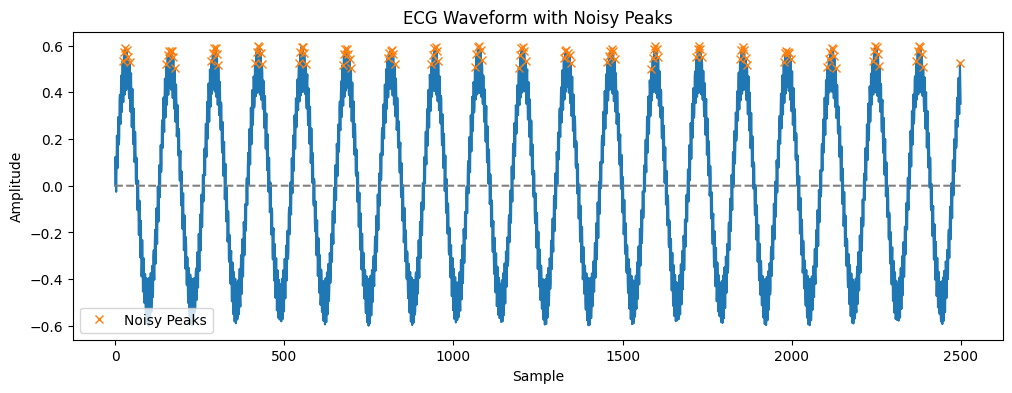

 
Skipping label_15.npy: Invalid or non-numeric data


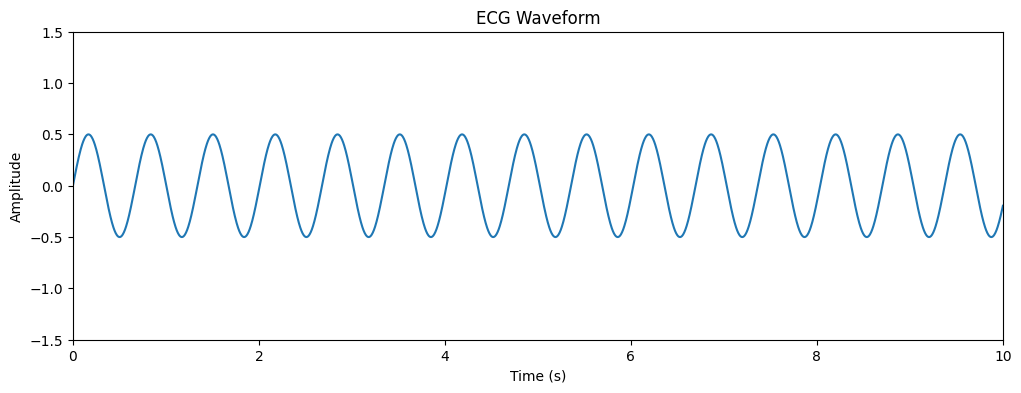

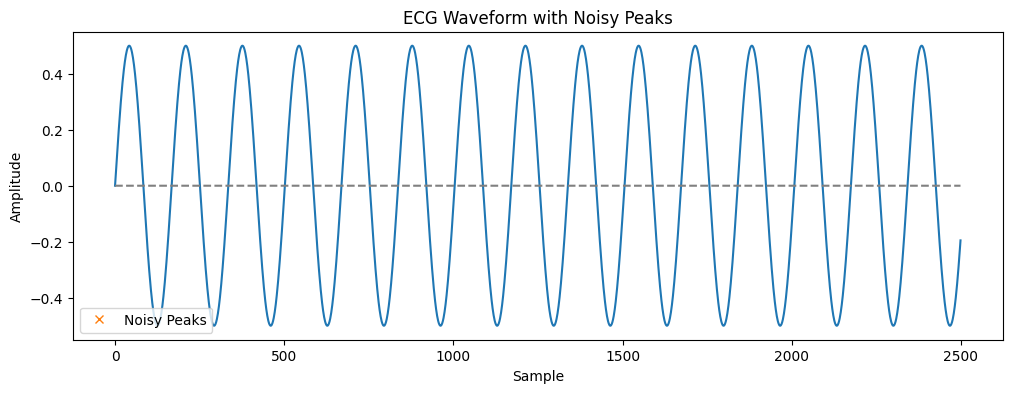

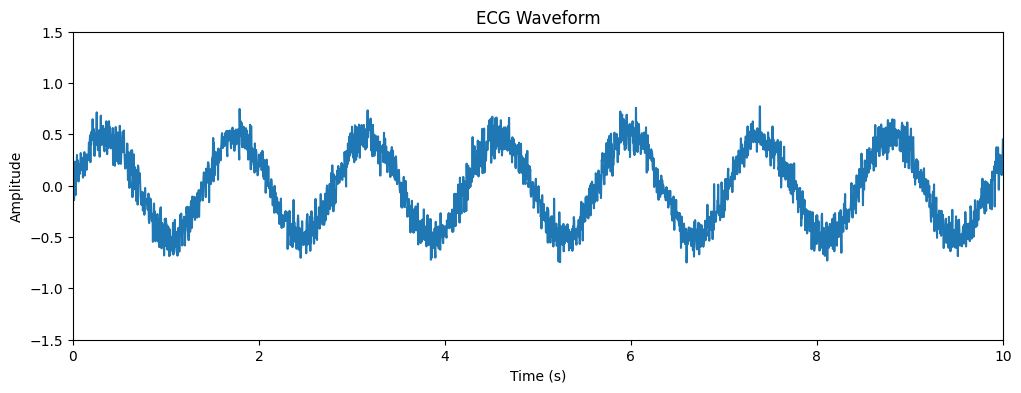

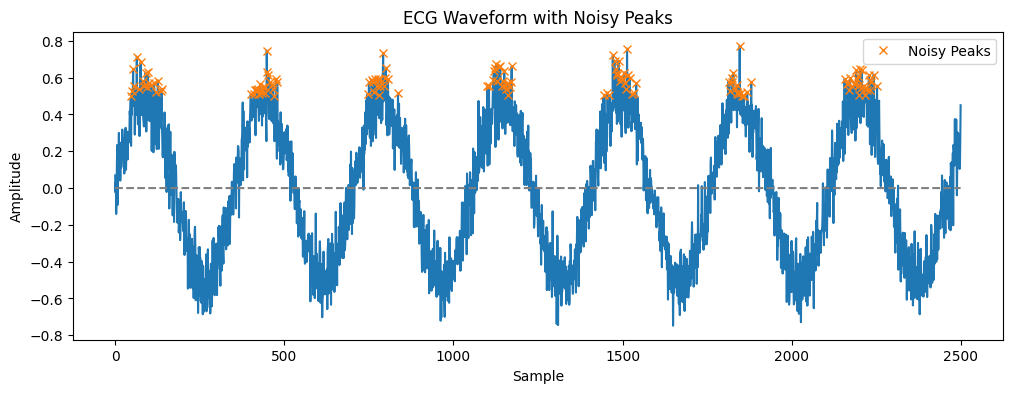

ECG Signal Quality for synthetic_ecg_2.npy: Barely acceptable
Skipping label_0.npy: Invalid or non-numeric data


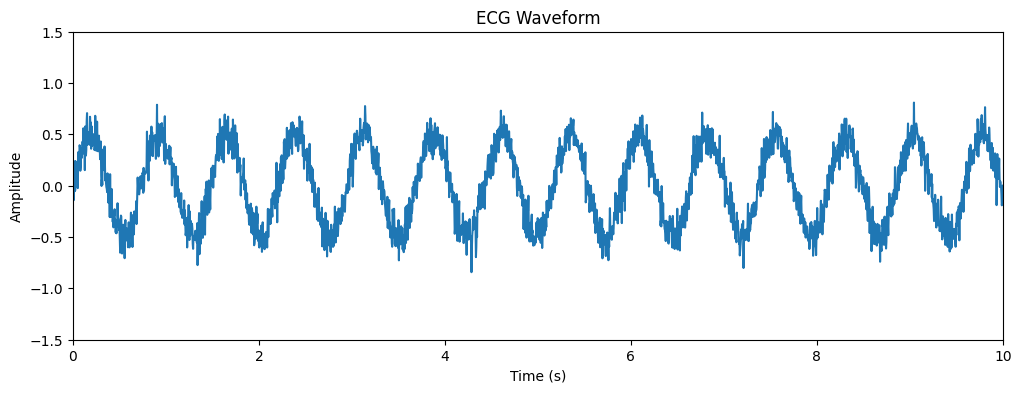

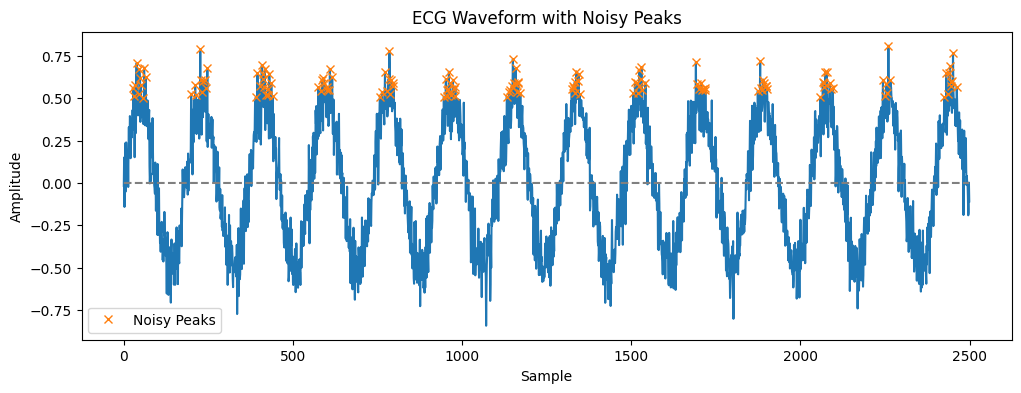

 
Skipping label_16.npy: Invalid or non-numeric data


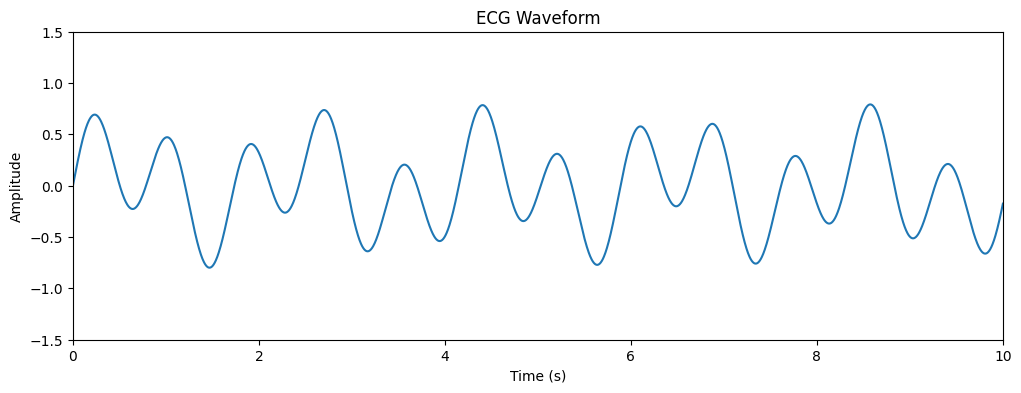

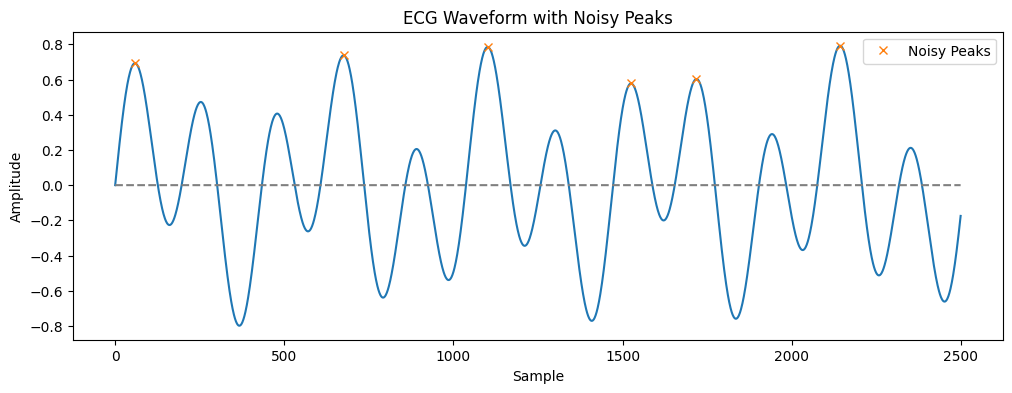

ECG Signal Quality for synthetic_ecg_11.npy: Barely acceptable
Skipping label_5.npy: Invalid or non-numeric data


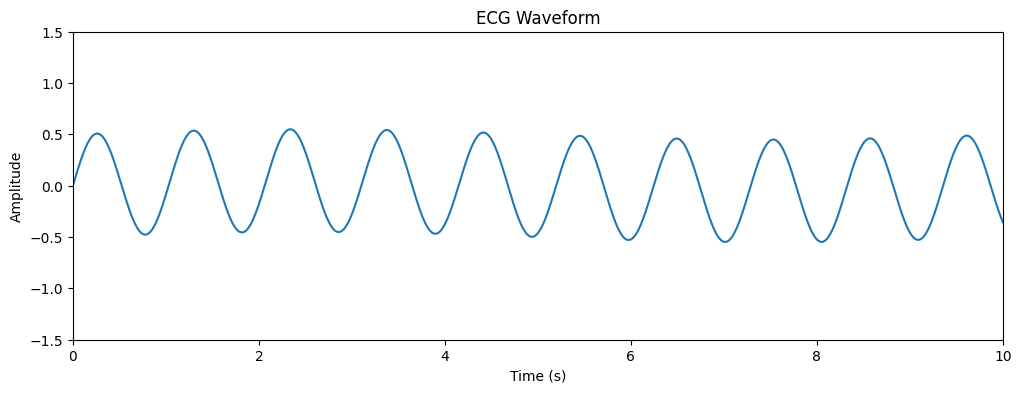

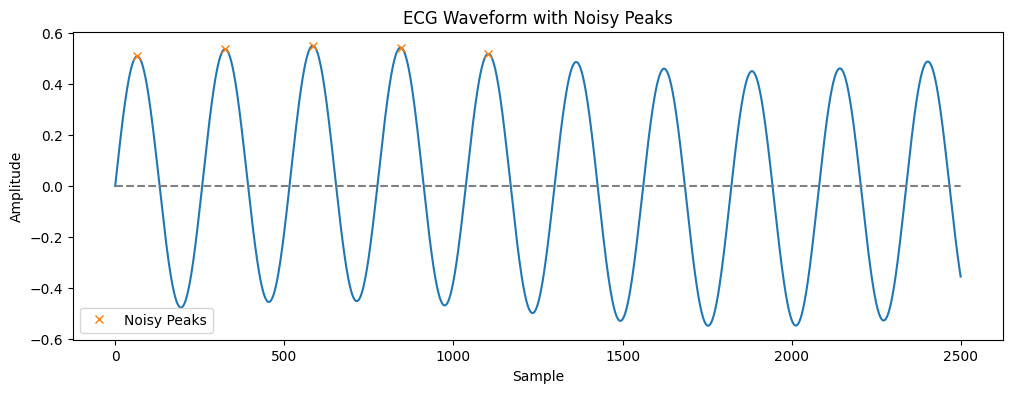

ECG Signal Quality for synthetic_ecg_19.npy: Barely acceptable


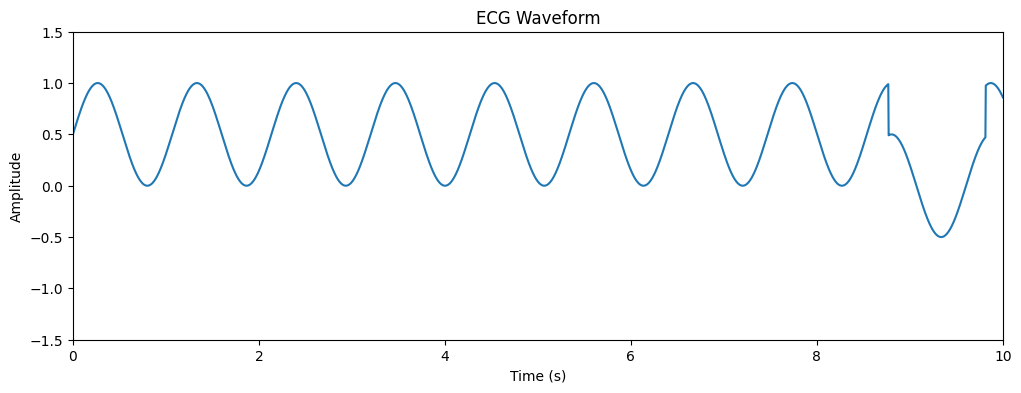

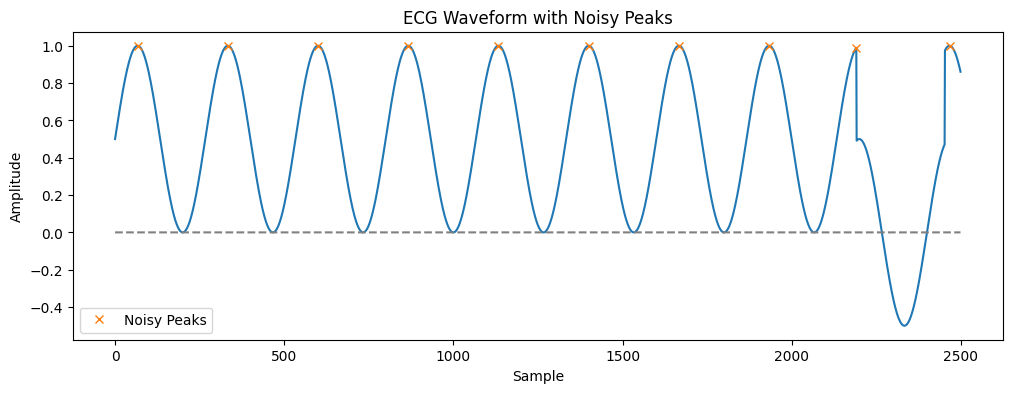

ECG Signal Quality for synthetic_ecg_13.npy: Barely acceptable
Skipping label_11.npy: Invalid or non-numeric data
Skipping label_8.npy: Invalid or non-numeric data


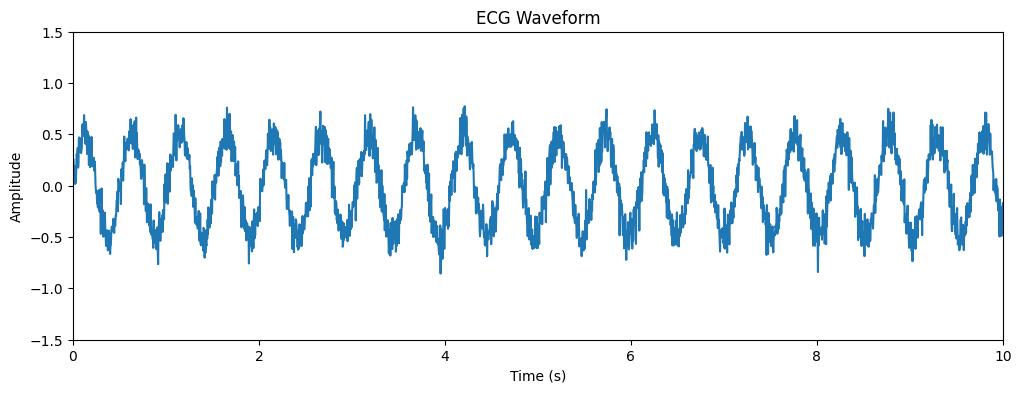

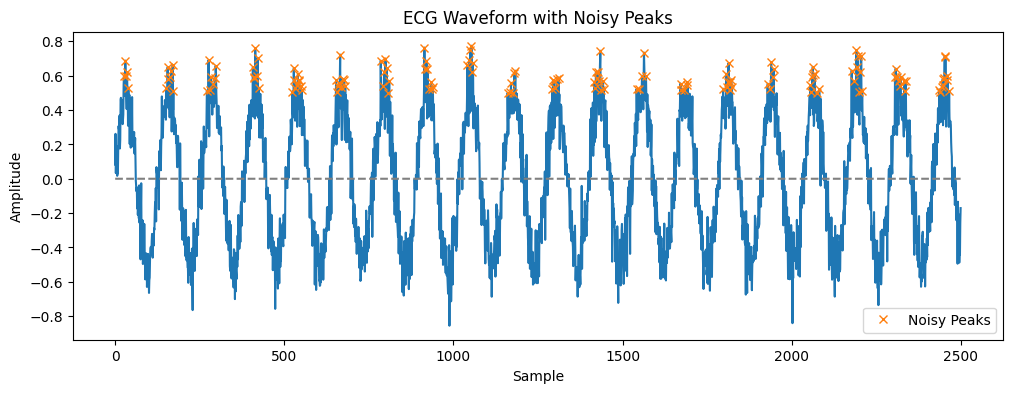

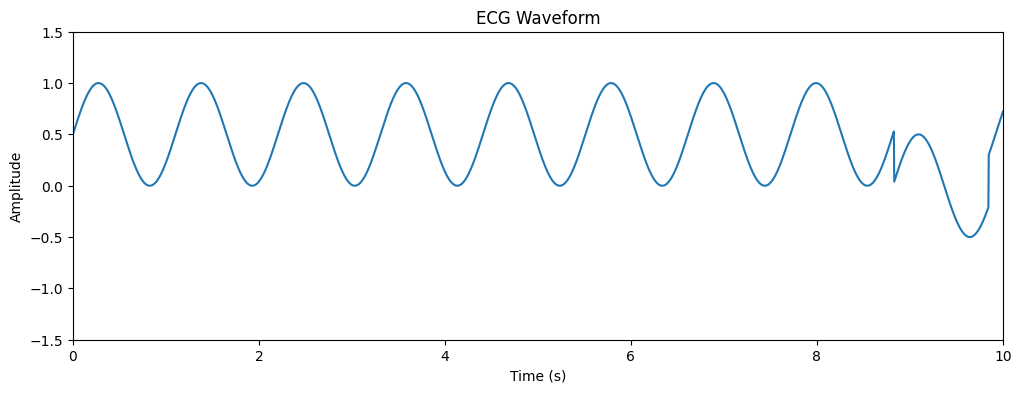

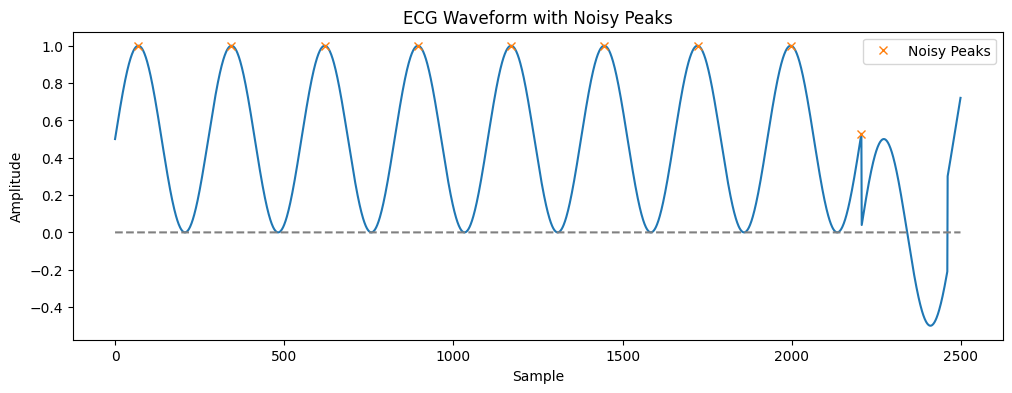

ECG Signal Quality for synthetic_ecg_16.npy: Barely acceptable


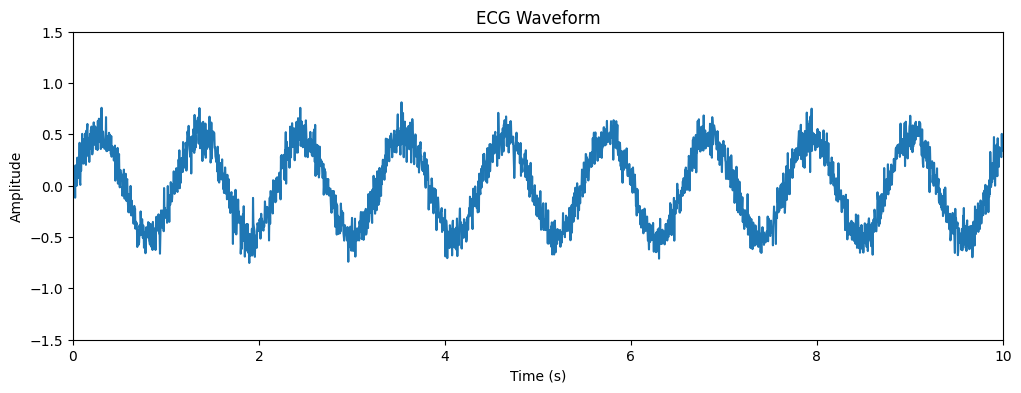

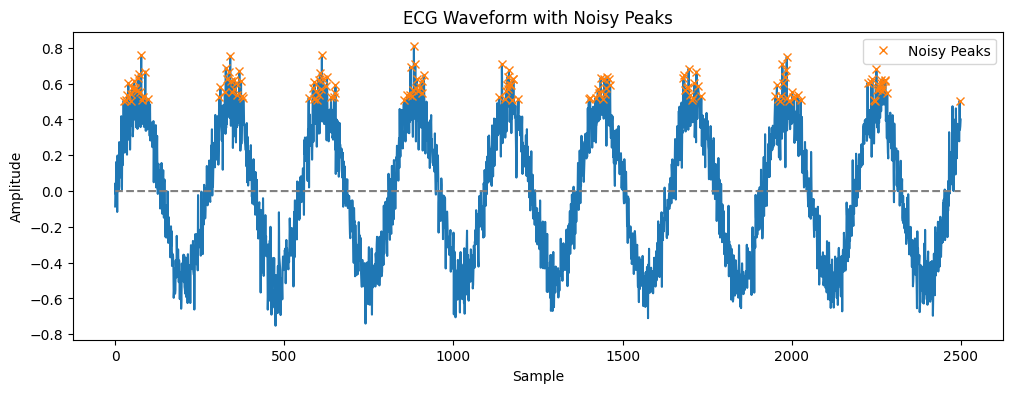

ECG Signal Quality for synthetic_ecg_6.npy: Unnacceptable


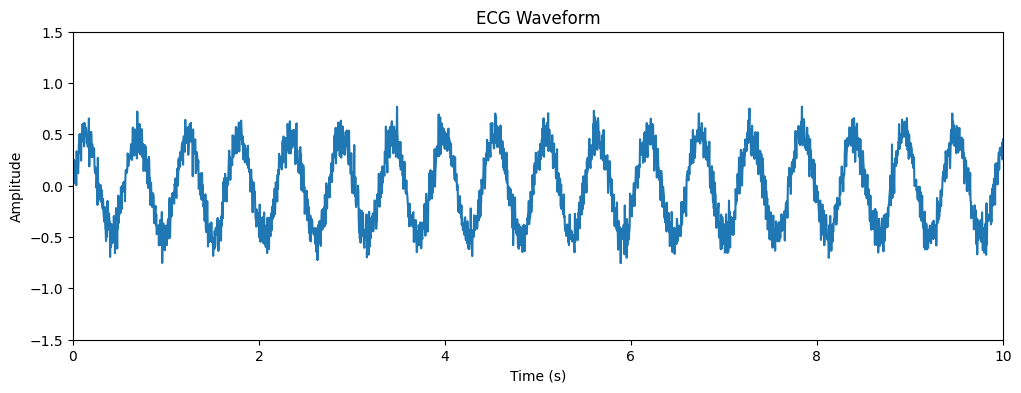

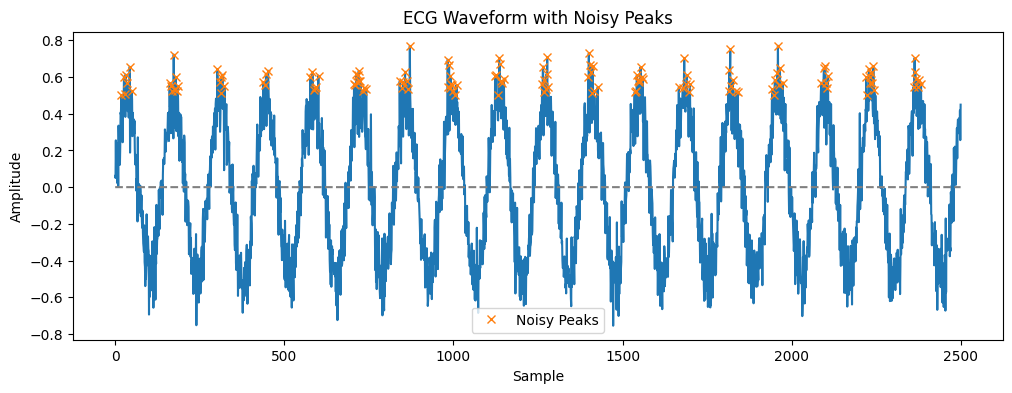

ECG Signal Quality for synthetic_ecg_12.npy: Barely acceptable


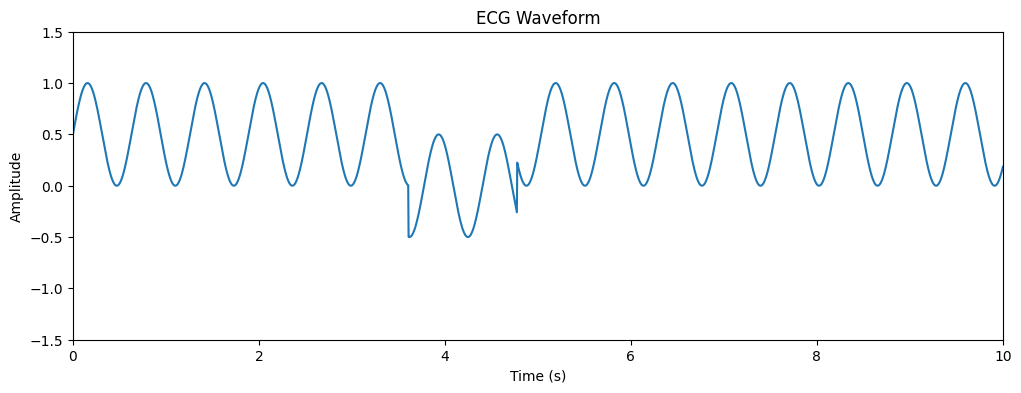

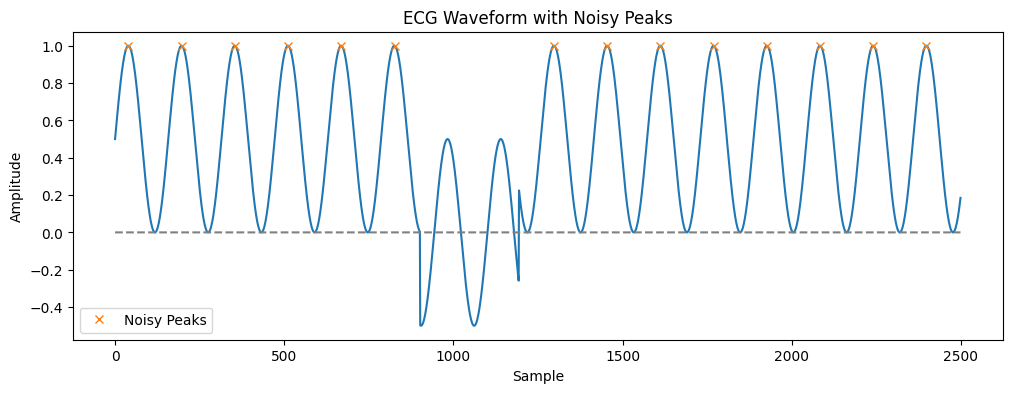

ECG Signal Quality for synthetic_ecg_3.npy: Barely acceptable
Skipping label_12.npy: Invalid or non-numeric data
Skipping label_13.npy: Invalid or non-numeric data
Skipping label_3.npy: Invalid or non-numeric data
Skipping label_17.npy: Invalid or non-numeric data
Skipping label_19.npy: Invalid or non-numeric data


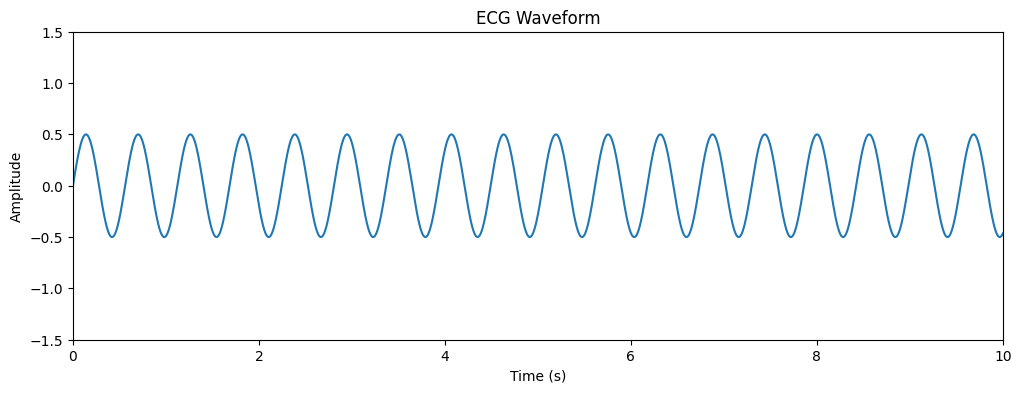

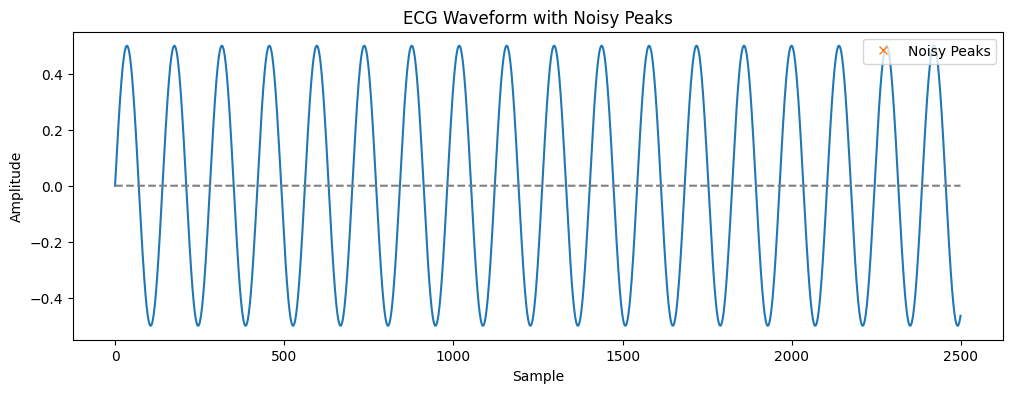

ECG Signal Quality for synthetic_ecg_8.npy: Barely acceptable


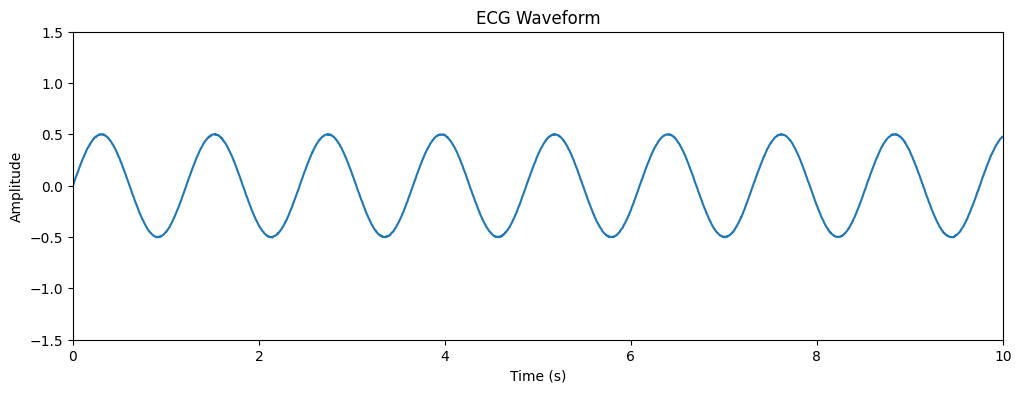

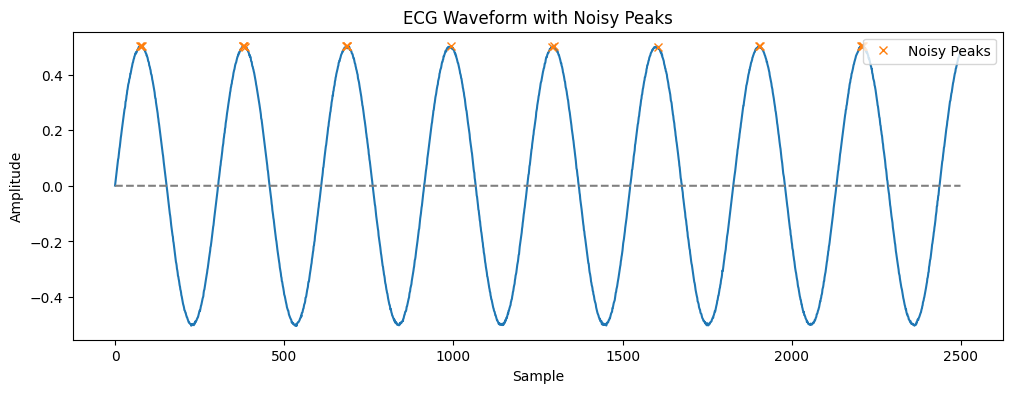

ECG Signal Quality for synthetic_ecg_1.npy: Unnacceptable
Skipping label_18.npy: Invalid or non-numeric data
Skipping label_9.npy: Invalid or non-numeric data
Skipping label_1.npy: Invalid or non-numeric data
Skipping label_2.npy: Invalid or non-numeric data
Skipping label_7.npy: Invalid or non-numeric data
Skipping label_4.npy: Invalid or non-numeric data


In [10]:
import os
import numpy as np
import matplotlib.pyplot as plt
from scipy.signal import find_peaks
import neurokit2 as nk

# Specify the directory where the ECG signal files are saved
load_directory = "/content/output/"

# List all files in the directory
signal_files = [f for f in os.listdir(load_directory) if f.endswith(".npy")]

# Function for ECG signal preprocessing (modify as needed)
def preprocess_ecg_signal(signal, fs):
    # Add your preprocessing steps here if needed
    return signal

# Load and process each ECG signal file
for signal_filename in signal_files:
    # Combine the load_directory and filename to create the full path
    signal_full_path = os.path.join(load_directory, signal_filename)

    try:
        # Load the ECG signal from the file
        ecg_waveform = np.load(signal_full_path)

        # Check if the loaded data is numeric (numpy ndarray)
        if not isinstance(ecg_waveform, np.ndarray) or not np.issubdtype(ecg_waveform.dtype, np.number):
            print(f"Skipping {signal_filename}: Invalid or non-numeric data")
            continue  # Skip this file and move to the next one

        # Perform basic preprocessing (e.g., filtering) as needed
        fs = 250  # Replace with the actual sampling rate of your ECG signal
        ecg_waveform = preprocess_ecg_signal(ecg_waveform, fs)

        # Plot the ECG waveform
        t = np.linspace(0, len(ecg_waveform) / fs, num=len(ecg_waveform))
        plt.figure(figsize=(12, 4))
        plt.plot(t, ecg_waveform)
        plt.title('ECG Waveform')
        plt.xlabel('Time (s)')
        plt.ylabel('Amplitude')
        plt.xlim(0, len(ecg_waveform) / fs)
        plt.ylim(-1.5, 1.5)
        plt.show()

        # Detect noisy peaks in the ECG signal
        peaks, _ = find_peaks(ecg_waveform, height=0.5)  # Adjust the threshold as needed

        # Plot the ECG waveform with noisy peaks highlighted
        plt.figure(figsize=(12, 4))
        plt.plot(ecg_waveform)
        plt.plot(peaks, ecg_waveform[peaks], "x", label="Noisy Peaks")
        plt.plot(np.zeros_like(ecg_waveform), "--", color="gray")
        plt.title('ECG Waveform with Noisy Peaks')
        plt.xlabel('Sample')
        plt.ylabel('Amplitude')
        plt.legend()
        plt.show()

        # Assess the quality of the ECG signal
        quality = nk.ecg_quality(ecg_waveform, sampling_rate=fs, method='zhao2018', approach='fuzzy')
        print(f'ECG Signal Quality for {signal_filename}: {quality}')
    except Exception as e:
        print(" ")
        # print(f"Error processing {signal_filename}: {str(e)}")


# **Detecting the noise type**

**IN this code we will give the input signal file to the code and it will determine what type of noise is present in the Signal**

In [91]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.signal import butter, filtfilt
import glob

# Define the directory containing the signal data files
directory_path = '/content/output/'

# List all .npy files in the directory that match the pattern /content/output/synthetic_ecg_**.npy
file_paths = glob.glob(directory_path + 'synthetic_ecg_*.npy')

# Sample rate (make sure this matches the sample rate of your data)
fs = 1000  # Replace with your sample rate

# Motion artifact frequency range (adjust as needed)
motion_artifact_lowcut = 0.05  # Lower frequency limit (positive value)
motion_artifact_highcut = 0.5  # Upper frequency limit (positive value)
motion_artifact_threshold = 0.2  # Define the motion artifact threshold here


# Gaussian noise threshold (adjust as needed)
gaussian_noise_threshold = 0.1  # You can change this value

def butter_highpass(cutoff, fs, order=5):
    nyq = 0.5 * fs
    normal_cutoff = cutoff / nyq
    b, a = butter(order, normal_cutoff, btype='high', analog=False)
    return b, a

def highpass_filter(data, cutoff, fs, order=5):
    b, a = butter_highpass(cutoff, fs, order=order)
    y = filtfilt(b, a, data)
    return y

def butter_bandstop(lowcut, highcut, fs, order=5):
    nyq = 0.5 * fs
    low = lowcut / nyq
    high = highcut / nyq
    b, a = butter(order, [low, high], btype='bandstop', analog=False)
    return b, a

def bandstop_filter(data, lowcut, highcut, fs, order=5):
    b, a = butter_bandstop(lowcut, highcut, fs, order=order)
    y = filtfilt(b, a, data)
    return y

# Function to detect ECG signal dropout
def detect_ecg_dropout(signal, threshold=0.5):
    # Calculate the difference between consecutive samples
    diff_signal = np.diff(signal)

    # Detect abrupt drops in amplitude
    dropout_indices = np.where(diff_signal < -threshold)[0]

    # Determine if ECG signal dropout is present
    return len(dropout_indices) > 0

def detect_noise(signal, fs):
    noise_types = []

    # High-pass filter setup for baseline wander
    baseline_wander_lowcut = 0.5

    # Apply high-pass filter for baseline wander
    baseline_wander_filtered_data = highpass_filter(signal, baseline_wander_lowcut, fs)

    # Calculate the mean absolute difference between original and filtered signals for baseline wander
    baseline_wander_mean_abs_diff = np.mean(np.abs(signal - baseline_wander_filtered_data))
    if baseline_wander_mean_abs_diff > baseline_wander_threshold:
        noise_types.append('Baseline Wander')

    # Muscle artifact frequency range (adjust as needed)
    muscle_artifact_lowcut = 20  # Lower frequency limit
    muscle_artifact_highcut = 150  # Upper frequency limit

    # Apply bandstop filter for the muscle artifact frequency range
    muscle_artifact_filtered_data = signal.copy()
    lowcut = muscle_artifact_lowcut - 5.0  # Adding some margin
    highcut = muscle_artifact_highcut + 5.0  # Adding some margin
    muscle_artifact_filtered_data = bandstop_filter(muscle_artifact_filtered_data, lowcut, highcut, fs)

    # Calculate the mean absolute difference between original and filtered signals for muscle artifact
    muscle_artifact_mean_abs_diff = np.mean(np.abs(signal - muscle_artifact_filtered_data))
    if muscle_artifact_mean_abs_diff > muscle_artifact_threshold:
        noise_types.append('Muscle Artifact')

    # Powerline interference frequencies (commonly 50 Hz or 60 Hz)
    powerline_frequencies = [50, 60]  # Change as per your region

    # Apply bandstop filter for each powerline frequency for powerline interference
    powerline_interference_filtered_data = signal.copy()
    for frequency in powerline_frequencies:
        lowcut = frequency - 0.5
        highcut = frequency + 0.5
        powerline_interference_filtered_data = bandstop_filter(powerline_interference_filtered_data, lowcut, highcut, fs)

    # Calculate the mean absolute difference between original and filtered signals for powerline interference
    powerline_interference_mean_abs_diff = np.mean(np.abs(signal - powerline_interference_filtered_data))
    if powerline_interference_mean_abs_diff > powerline_interference_threshold:
        noise_types.append('Powerline Interference')

    # Detect motion artifact
    motion_artifact_lowcut = 0.05  # Lower frequency limit (positive value)
    motion_artifact_highcut = 0.5  # Upper frequency limit (positive value)
    motion_artifact_filtered_data = signal.copy()
    lowcut = motion_artifact_lowcut - 0.01  # Adding some margin
    highcut = motion_artifact_highcut + 0.01  # Adding some margin
    motion_artifact_filtered_data = bandstop_filter(motion_artifact_filtered_data, lowcut, highcut, fs)
    motion_artifact_mean_abs_diff = np.mean(np.abs(signal - motion_artifact_filtered_data))
    if motion_artifact_mean_abs_diff > motion_artifact_threshold:
        noise_types.append('Motion Artifact')

    # Calculate the mean absolute difference from the mean (a measure of signal variation)
    signal_mean = np.mean(signal)
    signal_std = np.std(signal)
    gaussian_noise_mean_abs_diff = np.mean(np.abs(signal - signal_mean))
    if gaussian_noise_mean_abs_diff < gaussian_noise_threshold:
        noise_types.append('Gaussian Noise')

    if not noise_types:
        noise_types.append('No Significant Noise')

    return noise_types

# List to store results
results = []

# Loop through all signal files
for file_path in file_paths:
    # Load the signal data from the file
    data = np.load(file_path)

    # Detect noise types in the signal
    detected_noises = detect_noise(data, fs)

    # Detect ECG signal dropout in the signal
    ecg_dropout_present = detect_ecg_dropout(data)

    # Extract the signal name from the file path
    signal_name = file_path.split('/')[-1]

    # Store the result in the results list
    results.append((signal_name, detected_noises, ecg_dropout_present))

# Print the results
for signal_name, detected_noises, ecg_dropout_present in results:
    print(f"Signal {signal_name}: Detected Noise Types - {', '.join(detected_noises)}, ECG Dropout Present - {ecg_dropout_present}")


Signal synthetic_ecg_0.npy: Detected Noise Types - Motion Artifact, ECG Dropout Present - True
Signal synthetic_ecg_5.npy: Detected Noise Types - Motion Artifact, ECG Dropout Present - False
Signal synthetic_ecg_9.npy: Detected Noise Types - Baseline Wander, Motion Artifact, ECG Dropout Present - False
Signal synthetic_ecg_14.npy: Detected Noise Types - Motion Artifact, ECG Dropout Present - False
Signal synthetic_ecg_4.npy: Detected Noise Types - Motion Artifact, ECG Dropout Present - False
Signal synthetic_ecg_17.npy: Detected Noise Types - Motion Artifact, ECG Dropout Present - False
Signal synthetic_ecg_15.npy: Detected Noise Types - Motion Artifact, ECG Dropout Present - False
Signal synthetic_ecg_18.npy: Detected Noise Types - Motion Artifact, ECG Dropout Present - False
Signal synthetic_ecg_2.npy: Detected Noise Types - Baseline Wander, Motion Artifact, ECG Dropout Present - False
Signal synthetic_ecg_7.npy: Detected Noise Types - Motion Artifact, ECG Dropout Present - False
Sig

# **Visualizing Model Performance**







**Splitting, Training, and Evaluating a Random Forest Classifier**







In [90]:
# Split the dataset into training and test sets
X, y = generate_synthetic_dataset(num_samples=10000)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize and train a machine learning model (Random Forest classifier)
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
classification_rep = classification_report(y_test, y_pred)

print("Accuracy:", accuracy*100, "%")
print("Classification Report:\n", classification_rep)

Accuracy: 77.75 %
Classification Report:
                                    precision    recall  f1-score   support

          Noisy (Baseline Wander)       1.00      1.00      1.00       216
                Noisy (Clean ECG)       0.50      0.55      0.53       214
          Noisy (Muscle Artifact)       1.00      1.00      1.00       201
  Noisy (electrode_contact_noise)       0.52      0.47      0.49       223
     Noisy (electrode_disconnect)       1.00      1.00      1.00       223
Noisy (electrode_motion_artifact)       0.50      0.50      0.50       230
           Noisy (gaussian_noise)       0.98      1.00      0.99       199
          Noisy (motion_artifact)       0.54      0.55      0.54       249
   Noisy (powerline interference)       1.00      1.00      1.00       245

                         accuracy                           0.78      2000
                        macro avg       0.78      0.78      0.78      2000
                     weighted avg       0.78      0.78  

**Code for Visualizing Confusion Matrix and Feature Importances**

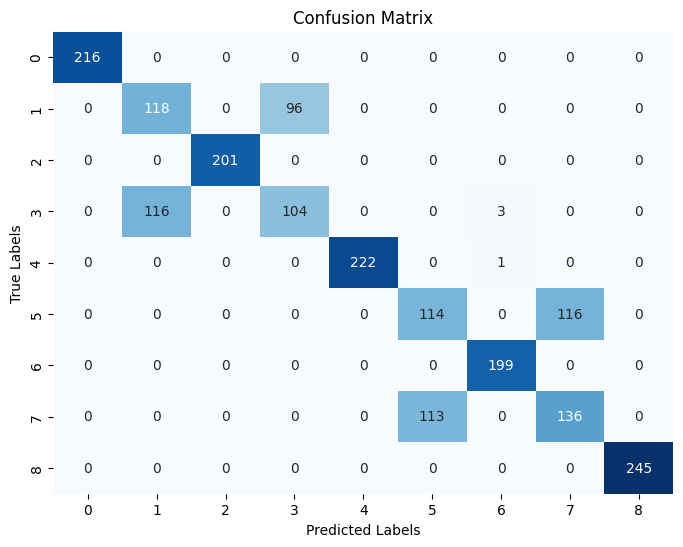

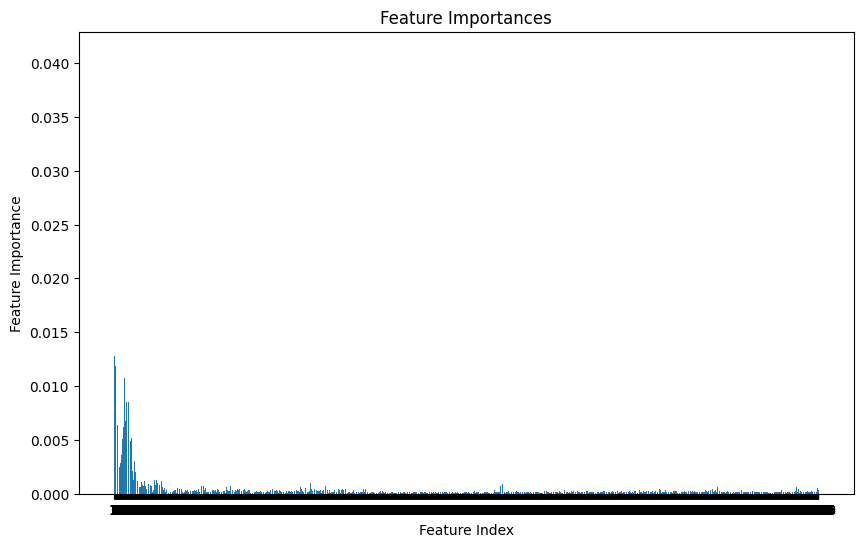

In [92]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

# Create a confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)

# Plot the confusion matrix as a heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", cbar=False)
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")
plt.title("Confusion Matrix")
plt.show()

# Plot feature importances
importances = model.feature_importances_
features = range(len(importances))

plt.figure(figsize=(10, 6))
plt.bar(features, importances)
plt.xlabel("Feature Index")
plt.ylabel("Feature Importance")
plt.title("Feature Importances")
plt.xticks(features)
plt.show()
